S. 206

Fordward und Backward Pass für ein einziges Neuron mit mehreren Layer:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# 1x batch mit 3x Gradient Samples vom rechten layer (hier einfach inkrementel)
dvalues = np.array([[1., 1., 1.],
                    [2., 2., 2.],
                    [3., 3., 3.]])
# im Buch FALSCH! Ein Gradienten-Vektor für ein einziges Neuron sollte einen Shape von (3, 1) haben, wenn es 3 Samples sind.

# We have 3 Samples of inputs für 1 Neuron mit je 4 Gewichten/Inputs
inputs = np.array([[1, 2, 3, 2.5],
                   [2., 5., -1., 2],
                   [-1.5, 2.7, 3.3, -0.8]])

# We have 3 sets of weights - je sample
# We have 4 inputs, thus 4 weights für den kompletten BATCH!
# FEHLER: eig dürfte man nur 3 Reihen an Weights sein, wenn es auch 3 Neuronen sind!
# So wie jetzt wären es 3 Neuronen mit 4 Weights, für 4 Inputs
# Recall that we keep weights transposed
#weights = np.array([[0.2, 0.8, -0.5, 1],
                    #[0.5, -0.91, 0.26, -0.5],
                    #[-0.26, -0.27, 0.17, 0.87]]).T

weights = np.array([[0.2, 0.8, -0.5, 1]]).T

# One bias for each sample
# biases are the row vector with a shape (1, Neurons) bei mehreren Neuronen!
# FEHLER: Bei einem Neuron ist es logischerweise eigentlich über alle Samples hinweg 1 Wert! Singular! "bias = 2"
biases = np.array([[2, 3, 0.5]])

# Forward pass
Z = np.dot(inputs, weights) + biases.T # Dense layer Z = X*W + b
relu_outputs = np.maximum(0, Z) # ReLU activation

In [73]:
weights # transponiert

array([[ 0.2],
       [ 0.8],
       [-0.5],
       [ 1. ]])

In [74]:
inputs.shape, weights.shape

((3, 4), (4, 1))

In [70]:
1*0.2 + 2.0*0.8 + 3*-0.5 + + 2.5*1

2.8

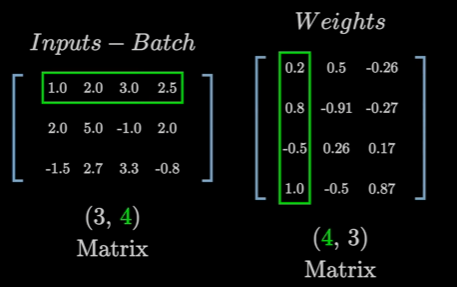 $=$ $2,8$

https://nnfs.io/crq/

In [75]:
np.dot(inputs, weights)

array([[ 2.8 ],
       [ 6.9 ],
       [-0.59]])

$+$

In [76]:
biases

array([[2. , 3. , 0.5]])

$=$

In [84]:
Z

array([[ 4.8 ],
       [ 9.9 ],
       [-0.09]])

3 Skalare als Outputs je Sample, dürfte es nicht nur $1$ sein ???
Ja! -> Liegt daran dass wir eine Weights Matrix mit 3 Gewichts Arrays haben. Was Quatsch ist da über alle Samples die Gewichte gleich bleiben sollten. Also es sollte keine Matrix mit (3,4) sonder eine mit (1,4) sein und Transponiert (4,1).

In [85]:
relu_outputs # hier fehlt die "-1.81"

array([[4.8],
       [9.9],
       [0. ]])

### Optimierung & Backpropagation

In [87]:
# Let's optimize and test backpropagation here
# ReLU activation - simulates derivative with respect to input values
# from next layer passed to current layer during backpropagation
drelu = relu_outputs.copy()
drelu[Z <= 0] = 0 # FALSCH! Ist ein Fehler im Buch, hier müsste eig alles 1 werden was > 0 ist. Hier wird Z einfach nur übernommen

Partielle Ableitung von $Inputs$ und $Weights$ in Respekt zueinander.

In [88]:
# dinputs - multiply by weights
dinputs = np.dot(drelu, weights.T)

# dweights - multiply by inputs
dweights = np.dot(inputs.T, drelu)

# dbiases - sum values, do this over samples (first axis), keepdims since this by default will produce a plain list
dbiases = np.sum(drelu, axis=0, keepdims=True)

In [90]:
weights, biases.T

(array([[ 0.2],
        [ 0.8],
        [-0.5],
        [ 1. ]]),
 array([[2. ],
        [3. ],
        [0.5]]))

Update mit Lernrate $0,001$ der Wights um Partielle Ableitungen der Weights und Biases

In [56]:
# Update parameters
weights += -0.001 * dweights
biases += -0.001 * dbiases

In [57]:
weights, biases

(array([[ 0.179515 ,  0.5003665, -0.262746 ],
        [ 0.742093 , -0.9152577, -0.2758402],
        [-0.510153 ,  0.2529017,  0.1629592],
        [ 0.971328 , -0.5021842,  0.8636583]]),
 array([[1.98489 , 2.997739, 0.497389]]))

**dinputs** muss man eig nie berechnen, da man es sowieso nie brauch. Man kann ja nicht die Inputs des NN optimieren sondern nur die Weights und Biases.

### Fazit zum Beispiel auf S.206-207
Es ist ein kläglicher Versuch ein Beispiel an einem Neuron von Forward und Backwardpass zu zeigen. Bei dem verwirrenderweise alles für 3 Neuronen aufgebaut ist und die Anzahl der Neuronen mit Anzahl der Samples verwechselt wird.

Und die Ableitung von ReLU ist quasi wieder ReLU und hat sich nicht verändert.

## Framework für NN
S. 209

In [100]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons) #random gesetzte Weights mit inputs*neuronen an weights
        self.biases = np.zeros((1, neurons)) #biases alle auf 0
    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases #berechnung von Z

class Activation_ReLU:
    def forward(self, Z):
        self.output = np.maximum(0, Z) # alles <= 0 -> 0 ansonsten X

Bei den Layer_Dense müssen wir uns die Inputs für Backpropagation merken, deswegen mittels Klassen-Attribut:

In [101]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        self.weights = 0.01 * np.random.randn(inputs, neurons) #random gesetzte Weights mit inputs*neuronen an weights
        self.biases = np.zeros((1, neurons)) #biases alle auf 0
    
    def forward(self, inputs):
        self.inputs = inputs #warum hier und nicht bei __init__
        self.output = np.dot(inputs, self.weights) + self.biases #berechnung von Z

Nun muss der Backward Pass in der Layer Klasse implementiert werden:

In [102]:
class Layer_Dense:

    def __init__(self, inputs, neurons):
        self.inputs = inputs
        self.weights = 0.01 * np.random.randn(inputs, neurons) #random gesetzte Weights mit inputs*neuronen an weights
        self.biases = np.zeros((1, neurons)) #biases alle auf 0
    
    def forward(self, inputs):
        self.inputs = inputs #unnötig hier?
        self.output = np.dot(inputs, self.weights) + self.biases #berechnung von Z

    def backward(self, dvalues): # gradients vom späteren Layer
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dinputs = np.dot(dvalues, self.weights.T)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

Nun auch für die $ReLU$ Klasse

In [ ]:
class Activation_ReLU:
    def forward(self, Z):
        self.output = np.maximum(0, Z) # alles <= 0 -> 0 ansonsten X

    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        # 0 Gradient where input values were negative, warum aber nicht "1" für positive Werte?
        self.dinputs[self.inputs <= 0] = 0


Hier ist noch was strange mit der Ableitung, ich finde hier sollte ReLU bei > 0 immer 1 sein und nicht einfach $z$

## Ableitung: *Categorical Cross Entropy* Loss Function

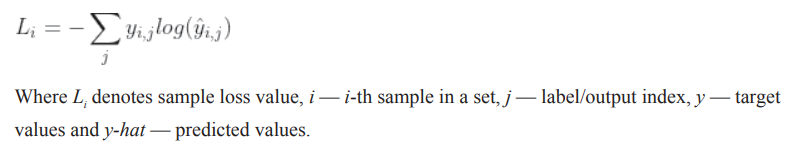

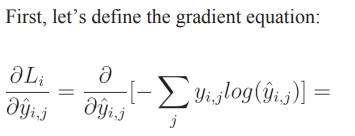 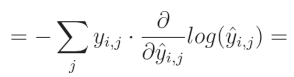

### Ableitung $log(x)$
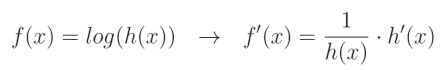

Nochmal mit der *Leibniz* Notation:

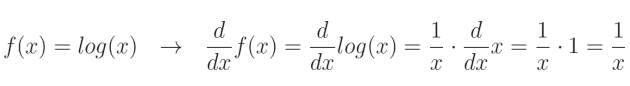

Aus:

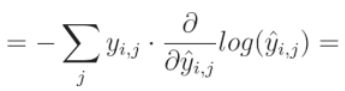 wird 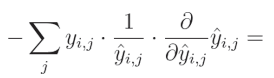

Kann wohl jetzt stark vereinfachen:

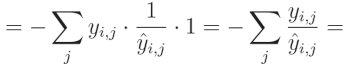 

Da man die Partielle Ableitung respektiv zu y macht, benötigt man die Summe auch nicht:

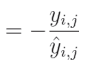

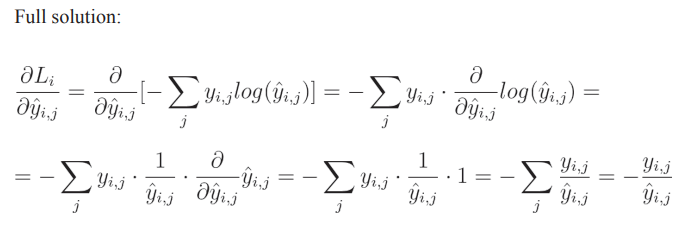

Zusammenfassend:

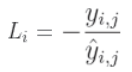

- $L_i$ ist der *Loss* je Sample
- $i$ ist der Sample im Batch
- $j$ ist der Label/Output-Index zum Sample $i$ (wenn man mehrere Klassen hat)
- $y$ ist das Target/Ziel zum Sample
- $\hat{y}$ ist der predictete Value

Die Ableitung dieser Loss Function respektiv zu ihren Inputs ist gleich dem negativen
Target-Vektor, geteilt durch den Vektor der vorhergesagten Werte (der auch der Ausgangsvektor
der Softmax-Funktion ist).

In [105]:
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # PLATZHALTER
        return None


class Loss_CategoricalCrossentropy(Loss):
    # ... forward() etc. 

    def backward(self, y_predicted, y_true):
        # Number of samples i
        samples = len(y_predicted)

        # Number of labels j in every sample. We'll use the first sample to count them
        # quasi pro sample mehrere ouputs also auch Klassen
        classes = len(y_predicted[0])

        # If classes are 1D, turn them into one-hot vector
        # In anderen Worten, wenn es nur einen Output gibt und wir aber mehrere Klassen klassifizieren wollen
        # also wenn wir mit einem output Neuron n Klassen mappen wollen, brauchen wir einen One-hot Vektor.
        if len(y_true.shape) == 1:
            y_true = np.eye(classes)[y_true] # np.eye() ist für eine Identitätsmatrix

        # Calculate Gradient
        self.dinputs = - (y_true / y_predicted)
        # Normalize Gradient, hat wohl was mit der Summe Gradienten zu tun ka
        self.dinputs = self.dinputs / samples

**np.eye(n)** für eine One-hot Kodierung:

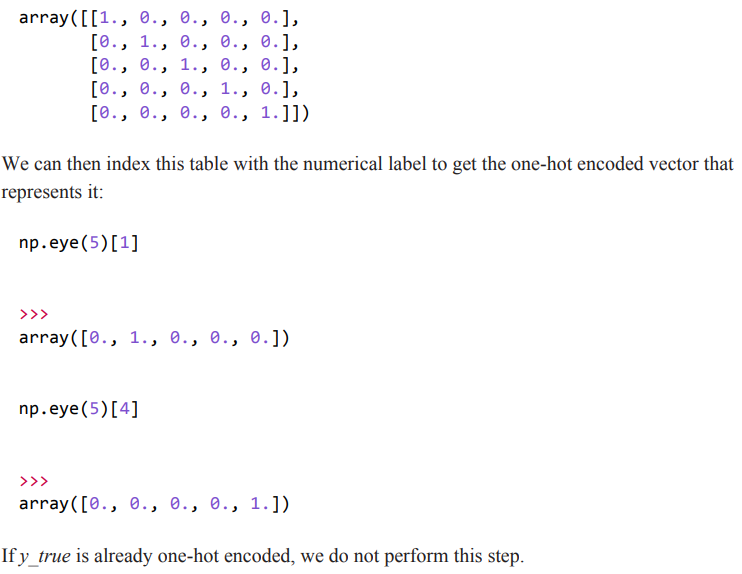

### Partielle Ableitung $softmax(z)$
Da wir in einem NN das mehrere Klassen klassifizeren soll, auch entsprechend viele Output-Neuronen haben, wird dort $Softmax$ eingesetzt. Die Ableitung von $Softmax$ ist wohl nicht so leicht wie die der Loss-Function, ist aber der zwingend nächste Schritt.

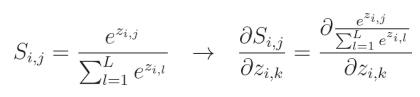

- $S_{i,k}$ ist der $k$ Input  vom Sample $i$
- $S_{i,j}$ ist der $j$ Output vom Sample $i$
- $z$ ist ein Vektor mit den $z$'s für jedes Output-Neuron vor der Aktivierung, quasi als Input des Neurons $j$
- $z_{i,j}$ ist der Input des Output-Neurons $j$ in Sample $i$
- $L$ ist die Anzahl der $z$'s, also quasi der Output-Neuronen im Vektor $z$


Die Umsetzung der Partiellen Ableitung bei $softmax(z)$ ist wohl deswegen so schwer, weil jedes $z_j$ des jeweiligen Output Neurons die jeweiligen Ausgänge von $softmax(z)$ beinflusst. Also muss für jeden Output die Partielle Ableitung respektiv zu jedem Input berechnet werden.

In der Praxis endet dass in einer Matrix. Auch als **Jacobian matrix** bekannt.

### Ableitung von $f(x)=\frac{g(x)}{h(x)}$
Zuerst müssen wir uns die Ableitungsregel für eine rationale Funktion anschauen:

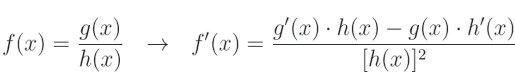

Wenn man sich Mühe und Zeit gibt, könnte man dann so vereinfachen:

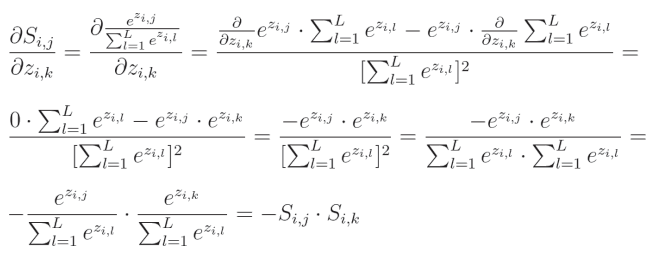

Noch eine Sache die wohl ergänzt werden muss:

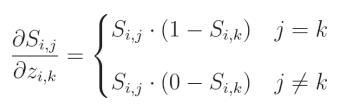

Es gibt also 2 Fälle die zu beachten sind:
1. Wenn der Output von Softax bei Sample $i$ gleich dem Output ist, dann das obere
2. Wenn sie ungleich sind, dann die untere Variante.

Es gibt noch die Notation *Kronecker delta*:

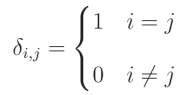

die 1 wird wenn $=$ und 0 wenn ungleich.

Das vorne angehangen vereinfach es nochmal:

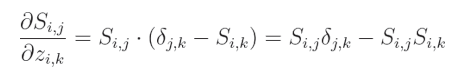

### Implementierung der Partiellen Ableitung $Softmax(z_{i,j})$
Beispiel an einem Output Neuron:

In [108]:
softmax_output = [0.7, 0.1, 0.2] # 3 Samples

# jetzt reshapen wir und tuhen so als wäre es eine Liste an Samples 
softmax_output = np.array(softmax_output).reshape(-1, 1)
softmax_output

array([[0.7],
       [0.1],
       [0.2]])

The left side of the equation is Softmax’s output multiplied by the Kronecker delta. The
Kronecker delta equals 1 when both inputs are equal, and 0 otherwise.

Hier kann man sich wohl wieder mit einer Identitätsmatrix und **np.eye(n)** helfen:

In [110]:
softmax_output.shape[0]

3

In [109]:
np.eye(softmax_output.shape[0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Jetzt machen wir quasi den linken Teil der Partiellen Ableitung:

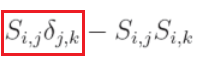

In [111]:
softmax_output * np.eye(softmax_output.shape[0])

array([[0.7, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.2]])

In [112]:
# kann man auch direkt abkürzen mit np.diagflat(<array>)
np.diagflat(softmax_output)

array([[0.7, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.2]])

Jetzt müssen wir den rechten Teil der Gleichung machen -> $Output_{klasseAktuell} * Output_{klasseK}$

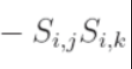

In [114]:
softmax_output.T

array([[0.7, 0.1, 0.2]])

In [113]:
np.dot(softmax_output, softmax_output.T)

array([[0.49, 0.07, 0.14],
       [0.07, 0.01, 0.02],
       [0.14, 0.02, 0.04]])

Auch im Text reden sie von den Outputs:

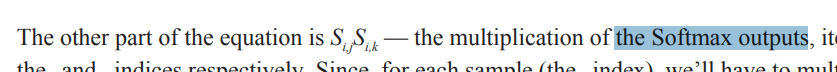

Habe ich mich evtl. vertan und es sind beides Outputs? Weil hier werden die Inputs passenderer Weise mit $z_{i,k}$ beschrieben:

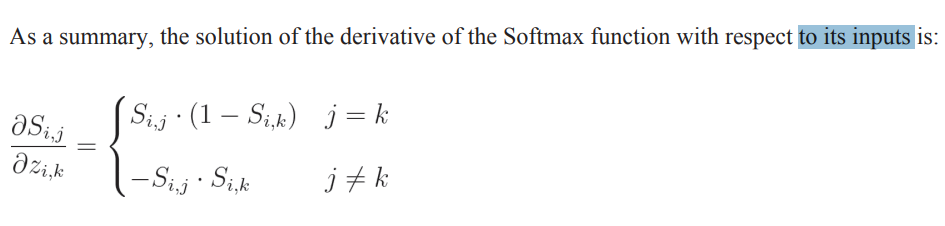

Aber was unterscheidet 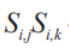 dann voneinander ???

**ANTWORT**: Das eine ist der Output für eine Klasse und das andere sind die Outputs für alle anderen.

Die partielle Ableitung von Softmax bezieht sich auf die Ableitung einer Softmax-Funktion in Bezug auf einen bestimmten Input.

Lassen Sie uns annehmen, dass die Softmax-Funktion als folgt definiert ist:

$S_{i,j} = \frac{e^{z_{i,j}}}{\sum_{k=1}^{L} e^{z_{i,k}}}$

Dann kann die partielle Ableitung von $S_{i,j}$ in Bezug auf $z_{i,k}$ wie folgt berechnet werden:

$\frac{\partial S_{i,j}}{\partial z_{i,k}} = \begin{cases} S_{i,j}(1 - S_{i,j}), &\text{if } j = k \ -S_{i,j}S_{i,k}, &\text{otherwise} \end{cases}$

Diese Ableitungen werden oft verwendet, um die gradientenbasierte Optimierung in neuronalen Netzen durchzuführen.

$S_{i,j}$ und $S_{i,k}$ sind die Ausgabewerte der Softmax-Funktion für eine bestimmte Eingabematrix $z$.

$S_{i,j}$ bezieht sich auf die Ausgabe der Softmax-Funktion für den $j$-ten Eingabevektor des $i$-ten Sample.

$S_{i,k}$ bezieht sich auf die Ausgabe der Softmax-Funktion für den $k$-ten Eingabevektor des $i$-ten Sample.

Die Eingabevektoren werden in der Regel von einer vorherigen Schicht eines neuronalen Netzes bereitgestellt und die Softmax-Funktion wandelt diese Ausgaben in Wahrscheinlichkeitsverteilungen um, die für die Klassifikation von Daten verwendet werden können.

In der Softmax-Funktion steht $j$ für den Index eines bestimmten Eingabevektors für ein bestimmtes Sample.

$S_{i,j}$ bezieht sich auf die Ausgabe der Softmax-Funktion für den $j$-ten Eingabevektor des $i$-ten Sample.

$k$ ist auch ein Index für einen Eingabevektor, aber für einen anderen Teil der Berechnung.

$S_{i,k}$ bezieht sich auf die Ausgabe der Softmax-Funktion für den $k$-ten Eingabevektor des $i$-ten Sample.

$z_{i,j}$ und $z_{i,k}$ sind die Eingabevektoren für die Softmax-Funktion, die für die Berechnung von $S_{i,j}$ und $S_{i,k}$ verwendet werden.

$L$ ist die Anzahl der Eingabevektoren für ein bestimmtes Sample. Die Summe in der Definition der Softmax-Funktion läuft über alle $L$ Eingabevektoren.

In einem neuronalen Netz kann es mehrere Samples geben, die gleichzeitig eingereicht werden, und jeder Sample kann seinen eigenen Eingabevektor haben. Daher ist es sinnvoll, jeden Eingabevektor mit einem Index zu identifizieren, der das jeweilige Sample identifiziert.

In diesem Kontext wird $i$ verwendet, um die Indexierung von Samples zu identifizieren, und $j$ wird verwendet, um die Indexierung von Klassen oder Klassifikationsmöglichkeiten innerhalb eines Samples zu identifizieren.

Das bedeutet, dass $S_{i,j}$ die Wahrscheinlichkeit darstellt, dass das $i$-te Sample in die $j$-te Klasse fällt, wenn es durch die Softmax-Funktion klassifiziert wird.

Daher ist es wichtig, beide Indizes $i$ und $j$ zu verwenden, um eindeutig zu identifizieren, welches Sample und welche Klasse betrachtet werden.

Mit **Eingabevektor** ist eigentlich nur ein $z$ gemeint.

und $z_{i,k}$ sind die anderen $z$'s in einem sample für die jeweiligen Output Neuronen $k$. Und wenn $j$ und $k$ gleich sind, schaut man sich gerade den gleichen Output an und deswegen wird dieser Fall dann anders behandelt.

<h2 style="Color:green">Einfach implementieren dann ergibt es sich wieder</h2>

Nun  müssen beide Teile voneinander abgezogen werden:

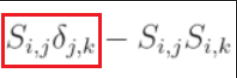

In [115]:
np.diagflat(softmax_output)

array([[0.7, 0. , 0. ],
       [0. , 0.1, 0. ],
       [0. , 0. , 0.2]])

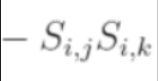

Wir müssen quasi die Softmax Outputs in allen Kombinationen miteinander multiplizierne. Mit **np.dot** kann man das verkürzen. Dafür muss aber der zweite Output wieder transposed werden:

In [117]:
np.dot(softmax_output, softmax_output.T)

array([[0.49, 0.07, 0.14],
       [0.07, 0.01, 0.02],
       [0.14, 0.02, 0.04]])

Dann voneinander abziehen:

In [118]:
np.diagflat(softmax_output) - np.dot(softmax_output, softmax_output.T)

array([[ 0.21, -0.07, -0.14],
       [-0.07,  0.09, -0.02],
       [-0.14, -0.02,  0.16]])

Dieses Verfahren wird auch **Jacobian matrix** genannt. Berechnen wir diese Matrizen für jedes Sample eines Batches, bekommen wir eine Liste mit diesen Matrizen. Effekt haben wir also eine Liste bei der jedes Element eine 3D Matrix ist.

Nun fangen wir von hinten an und müssen je Sample den Gradienten der Loss-Function mit der jeweiligen Jacobian Matrix per Kettenregel weiter nach vorne durchzureichen. Auch hier wieder mit **np.dot**. So bekommt man hinterher wohl wieder einen Vektor an partiellen Ableitungen je Sample und ein 2D Array je Batch.

In [119]:
# Softmax activation
class Activation_Softmax:
    # Forward pass ...

    # Backward pass, dvalues ist der Gradient von der Loss Function mit partiellen Ableitungen je Sample
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # iterate sample-wise over pairs of the outputs and gradients, calculating the partial derivatives
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # and Calculate sample-wise gradient
            # and add it to the array of sample gradients
            # Je Loss Function bekommt man einen Gradienten und eine jacobian_matrix.
            # Durch np.dot bekommen wir dann einen Vektor je Sample, die alle in dinputs gespeichert werden
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)

## Beliebte *Categorical Cross Entropy loss* & *Softmax* Ableitung
Mit dem oben gezeigten Beispiel haben wir eine Partielle Ableitung der *Categorical Cross Entropy loss* & *Softmax Funktionen* berechnet.  

Es gibt wohl noch Optimierungsmöglichkeiten des oben gezeigten Codes. Der Loop im Backward Step und die mehrfachen Operationen innerhalb des Loops kosten viel Zeit bei der Backpropagation und sind es wert optimiert zu werden.

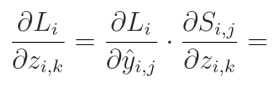

Da die Inputs der Loss Funktion $\hat{y_{i,j}}$ eben genau die Outputs der Softmax Funktion $S_{i,j}$ sind, kann man hier schon vereinfachen:

$\hat{y_{i,j}}$ = $S_{i,j}$

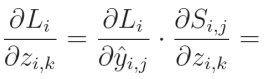 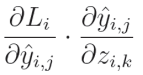

Nun darf man bei Partiellen Ableitungen nicht so einfach wie sonst kürzen. Aber man kann wohl den Teil der Partiellen ABleitung der Loss Funktion substituieren durch die Summe über die wahren Outputs $y_{i,j}$ und die Inputs der Loss Function $\hat{y_{i,j}}$:

Da folgendes gilt:

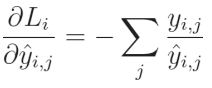

Kann man, diesen Term dadurch ersetzen:

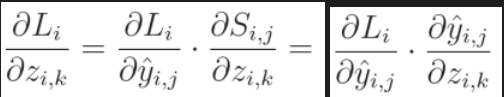 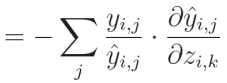

What the fuck alla

Da $\hat{y_{i,j}}$ = $S_{i,j}$ gilt kann man auch bei diesem komischen *Kronecker delta* ersetzen:

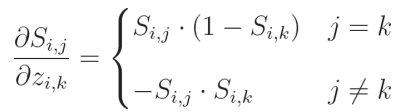

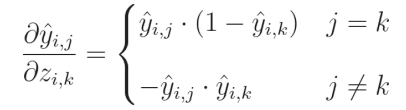

Diese beiden Cases kann man wohl mithilfe eines Sigmas auch in die Gleichung einbringen:

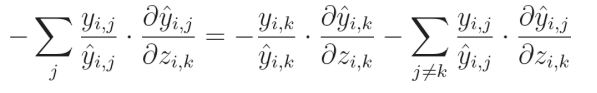

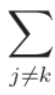 bedeutet dass er bei der Summe einfach den Fall $j=k$ ignorieren soll.

Wenn man dann noch etwas in den Indexen schraubt und die $j's$ durch $k's$ ersetzt, kommt man irgendwann auf das Ungetüm:

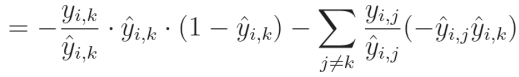

Das kann man dann wohl kürzen bis man auf folgendes kommt:

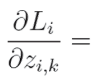 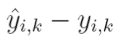

Ganz am Ende ist also nur noch der Abzug des Wahren Values vom Predicted Value in einem Sample um die Partielle Ableitung von der Loss-Function respektiv zu einem Input der Softmax Funktion zu finden.  Was die Berechnung natürlich massiv massiv vereinfacht. 

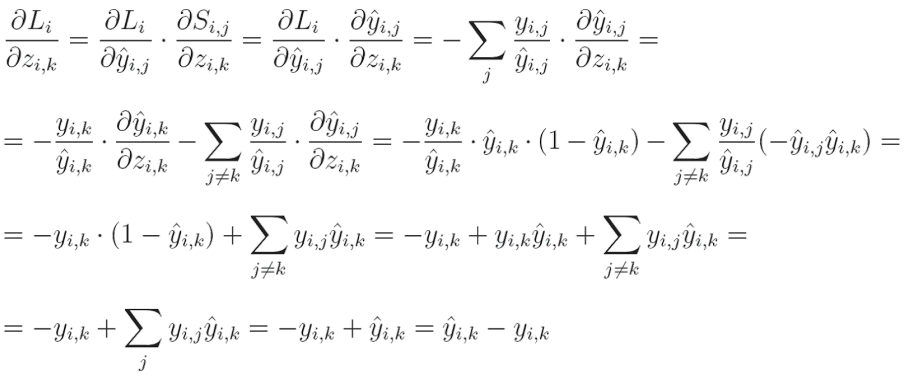 S.229



### Implementierung der vereinfachten Form
Wir machen für die Berechnung eine eigene Klasse

In [2]:
# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy:
    
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()

    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient, da wo der y_true Sample-Vektor maximal war ziehen wir eine -1 ab.
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

Falls dei Shape von y_true 2 ist, ist es eine Matrix die jeweils One-hot Vektoren je Sample beinhaltet, die transformiert werden müssen. Mit argmax() finden wir dann die eine "1" im Vektor, die die Klasse anzeigen soll.

Bei one-hot Vektoren als y_true können wir dann auch einfach $-1$ rechnen für 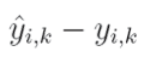
Und das -1 machen wir nur an den Stellen wo der One-hot Vektor den höchsten Wert hatte. Im maximalen Fall ist das bei $Softmax(z)$ natürlich eine $1$ könnte aber auch eine $0.7$ sein:

In [5]:
y_true = np.array([[1,0,0],[0,0,1],[0, 0.7, 0]])
np.argmax(y_true, axis=1)

array([0, 2, 1], dtype=int64)

Wir halten fest: 
- Wir haben keinen Loop mehr in **backward**
- durch die Ausgabe von $1$ um die Klasse zu kennzeichen, müssen wir auch immer nur $-1$ machen. Also wir müssen nichtmal multiplizieren oder sonst was.

## Der ganze Code...
S.232

In [11]:
# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # exponieren der unnormalized Werte, den höchsten Wert von allen anderen abziehen, um e^x nicht explodieren zu lassen
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


# Common Loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses, forward() kommt von Loss_CategoricalCrossentropy(Loss)
        sample_losses = self.forward(output, y)
        # Calculate mean loss über alle berechneten -np.logs() von der Tochterklasse Loss_CategoricalCrossentropy(Loss)
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss mit -log()
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0 mit -log() was in -infinity enden würde
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass, #dvalues ist hier eigentlich das gleiche wie y_predicted
    def backward(self, y_predicted, y_true):
        # Number of samples
        samples = len(y_predicted)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(y_predicted[0])
        # If labels are 1D, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = - (y_true / y_predicted)
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax() # Ouput von Softmax(z)
        self.loss = Loss_CategoricalCrossentropy() # Output von der Loss(a)
    
    # Forward pass: inputs -> Softmax(inputs) = S_output -> Loss(S_output) = loss
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, y_predicted, y_true):# y_predicted ist der Output von Softmax(z)=a, also die predicted values
        # und "dinputs" ist die Partielle Abl. von der Loss() respektiv zu seinem Inputs, was die Outputs a von Softmax sind
        # Number of samples
        samples = len(y_predicted)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = y_predicted.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples # "dinputs" ist dann die Partielle Abl. von Softmax respektiv zu seinen inputs z

## Testen der Partiellen Abl. von $Softmax(z)$ und $Loss(a)$
Ist im Moment also eig nur die optimierte Berechnung von der partiellen Ableitung der Loss Funktion am Ende des NNs und dei partiellen vom letzten Output Layer mit Softmax().

Und alles innerhalb von Activation_Softmax_Loss_CategoricalCrossentropy()!

Let's test it!

In [7]:
# 3 Output Samples, also 3x Softmax Output Neuronen
softmax_outputs = np.array([[0.7,  0.1,  0.2  ], # ergibt 1 
                            [0.1,  0.5,  0.4  ], # ergibt 1
                            [0.02, 0.9, 0.08]])  # ergibt 1

In [8]:
# folgende Targets sollen erlernt werden
class_targets = np.array([0, 1, 1])

Wir faken quasi dass wir die forward() von Activation_Softmax, Loss und Loss_CategoricalCrossentropy(Loss) ausgeführt haben, indem wir **softmax_outputs** einfach selber festgelegt haben und direkt die backward() der optimierten Activation_Softmax_Loss_CategoricalCrossentropy() gestartet haben.

Auch haben wir die forwards der Loss() funktionen gar nichtausgeführt.

In [13]:
# Initialisieren eins softmax_loss Objektes mit dem optimierten Vorgehen
softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()

# Anhauen des Backwards
softmax_loss.backward(softmax_outputs, class_targets)
dvalues1 = softmax_loss.dinputs
dvalues1

array([[-0.1       ,  0.03333333,  0.06666667],
       [ 0.03333333, -0.16666667,  0.13333333],
       [ 0.00666667, -0.03333333,  0.02666667]])

Das sind die Gradienten respektiv zu den Inputs von Softmax und Loss für die jeweiligen Outputs aus **softmax_outputs**

Aber jetzt nochmal den altmodische Weg:

In [14]:
# initialisieren einers Softmax(z) Objektes
activation = Activation_Softmax()
# anstatt den forward durch das objekt "activation" zu machen, 
# überschreiben wir das Klassen Attribut einfach mit dem manuell erstelltem array "softmax_outputs"
activation.output = softmax_outputs
# anlegen eines loss objektes für die echte backward berechnung
loss = Loss_CategoricalCrossentropy()
# tatsächlich berechnen wir aber den loss auf altmodische Art.
# ist die berechnung der partiellen abl. von loss(a) respektiv zu den inputs a von softmax(z)
loss.backward(activation.output, class_targets)
# berechnung der partiellen abl. von softmax(z) respektiv zu den Outputs/Gradienten von der loss(a)
# hier werden also altmodisch eine Jacobi Matrix erstellt
activation.backward(loss.dinputs)
dvalues2 = activation.dinputs
dvalues2

array([[-0.1       ,  0.03333333,  0.06666667],
       [ 0.03333333, -0.16666667,  0.13333333],
       [ 0.00666667, -0.03333333,  0.02666667]])

Vergleicht man die beiden, fällt auf dass die beiden fast genau gleich sind, obwohl viiiiel weniger gerechnet werdne musste bei der Kombination:

In [16]:
print("Gradienten für softmax_outputs: Mit kombiniertem und optimierten loss/activation")
print(dvalues1)
print("Gradienten für softmax_outputs: Mit seperaten loss und activation backwards()")
print(dvalues2)

Gradienten für softmax_outputs: Mit kombiniertem und optimierten loss/activation
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]
Gradienten für softmax_outputs: Mit seperaten loss und activation backwards()
[[-0.1         0.03333333  0.06666667]
 [ 0.03333333 -0.16666667  0.13333333]
 [ 0.00666667 -0.03333333  0.02666667]]


<h3 style="color:green">Geil!</h3>


Mathematik hat uns hier 2x **np.dots**  1x **for loop** und 1x **Division** erspart.

### Frage: Warum haben wir für nix den $Loss(a)$ berechnen müssen?
**Antwort**: Weil wir für die Berechnung der Gradienten nur die Inputs der $Loss(a)$ also den Output von $Softmax(z)$  kennen müssen. Der Mean Loss der mit $-log(correctConfidences)$ berechnet wird ist einfach nur eine Metrik zum sehen wie gut es performt. Damit wird Backpropagation nie realisiert!

Softmax alleine reicht aus um zu bestimmen wie weit wir off sind. Man rechnet einfach Minus 1, bei allen Werten die nicht 1 sein sollen.

### Frage: Wrm wird bei Backpropagation mit $Softmax(z)$ & *Categorical Cross-Entropy* nur $-1$ gerechnet?

Am Ende der starken Vereinfachung landeten wir ja bei:

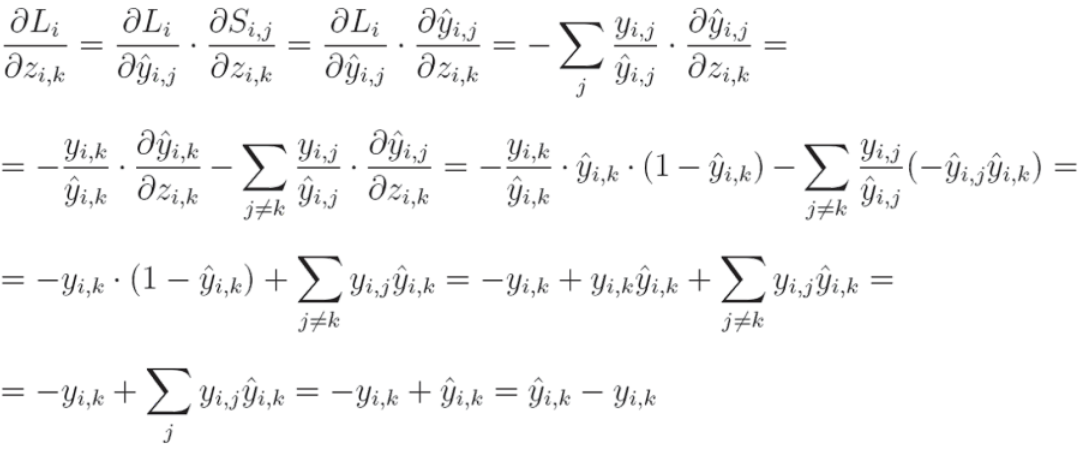

Laut dieser Formel dürfen wir nur eine $-1$ von dem richtigen Predicted Value abziehen, was bei mehreren Klassen also der Index der richtigen Klasse wäre. Dieser Fehler kann dann auf die Aktivierungen des neuronalen Netzes zurückverfolgt werden, um den Gradienten für die Gewichtungen zu berechnen.

Wenn die Zielklasse one-hot encoded ist, muss jedoch der höchste Werte gefunden werden und nur von diesem abgezogen werden.

Hier ein Beispiel mit diskreten Werten:

In [ ]:
# so lautet der Code richtig
self.dinputs[range(samples), y_true] -= 1

In [23]:
y_predicted = np.array([[0.7, 0.2, 0.1]]) # 0.1 wäre eig die richtige Klasse hier
dinputs = np.copy(y_predicted)

dinputs[range(len(y_predicted)), 2] -= 1
dinputs

array([[ 0.7,  0.2, -0.9]])

Die Crux:

Uns interessiert nur der Wert den wir optimieren müssen, denn da wir $Softmax(z)$ verwenden sind die Werte ja sowieso immer eine Normalverteilung. Der eine Wert an Index 2 ist genau $-0.9$ von seinem Ziel $1.0$ zu sein entfernt. Passen wir diesen also an und propagieren das Ganze zurück ins Netz werden $0.7$ und $0.2$ von ganz allein weniger, weil das die Natur von Softmax ist!

Nun sind die Werte ja noch ziemlich unnormal deswegen werden sie durch ein einfaches teilen wieder normalisisert:

In [ ]:
# im code verwenden wir
self.dinputs = self.dinputs / samples

In [26]:
dinputs = dinputs / len(dinputs) # ist hier natürlich "1"
dinputs

array([[ 0.7,  0.2, -0.9]])

Wie man sieht hat es natürlich keine Auswirkung hier aber wären es mehrere Samples in y_predicted, dann hätten wir die Werte über die Anzahl alle Samples normalisiert. Weil ein Sample soll genauso gewichtet werden wie alle anderen Samples!

### Tracken wir mal die Effizienz mit *timeit*

In [30]:
from timeit import timeit

softmax_outputs = np.array([[0.7, 0.1, 0.2],
                            [0.1, 0.5, 0.4],
                            [0.02, 0.9, 0.08]])
class_targets = np.array([0, 1, 1])

def f1(): # schnelle Methode mit -1 vom predicted für richtige klasse
    softmax_loss = Activation_Softmax_Loss_CategoricalCrossentropy()
    softmax_loss.backward(softmax_outputs, class_targets)
    dvalues1 = softmax_loss.dinputs

def f2(): # komplzierte variante mit Jacobi Matrix etc.
    activation = Activation_Softmax()
    activation.output = softmax_outputs
    loss = Loss_CategoricalCrossentropy()
    loss.backward(softmax_outputs, class_targets)
    activation.backward(loss.dinputs)
    dvalues2 = activation.dinputs

t1 = timeit(lambda: f1(), number=100000)
t2 = timeit(lambda: f2(), number=100000)

print("t1", t1, "t2", t2)

t1 1.1891767999986769 t2 3.8779370999982348


In [31]:
# fast 3x so schnell
t2 / t1

3.2610265353331394

In dem gegebenen Beispiel werden die Funktionen f1() und f2() jeweils 100.000 Mal aufgerufen und die durchschnittliche Ausführungszeit jeder Funktion wird berechnet. Die Ausführungszeit wird in Sekunden gemessen.

### Implementierung eines kompletten Modells mit Spiral Data

In [32]:
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

In [82]:
class Layer_Dense:
    def __init__(self, inputs, neurons):
        self.inputs = inputs
        self.weights = 0.01 * np.random.randn(inputs, neurons) #random gesetzte Weights mit inputs*neuronen an weights
        self.biases = np.zeros((1, neurons)) #biases alle auf 0
    
    def forward(self, inputs):
        self.inputs = inputs #unnötig hier? -> nein weil hier werden die echten Inputs gespeichert oben nur die Anzahl
        self.output = np.dot(inputs, self.weights) + self.biases #berechnung von "Z" nicht "z"

    def backward(self, dvalues): # gradients vom späteren Layer
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dinputs = np.dot(dvalues, self.weights.T)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        # 0 derivative where input values were negative, warum aber nicht "1" für positive Werte? Hier werden die positiven Werte einfach übernommen
        # weil so die Ableitung fuktioniert! "1" * dem Werte = der Wert
        self.dinputs[self.dinputs <= 0] = 0


# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs): # hier landet "A" von dense2
        # Remember input values für?
        self.inputs = inputs
        # exponieren der unnormalized Werte, den höchsten Wert von allen anderen abziehen, um e^x nicht explodieren zu lassen
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


# Common Loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses, forward() kommt von Loss_CategoricalCrossentropy(Loss)
        sample_losses = self.forward(output, y)
        # Calculate mean loss über alle berechneten -np.logs() von der Tochterklasse Loss_CategoricalCrossentropy(Loss)
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss mit -log()
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0 mit -log() was in -infinity enden würde
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass, #dvalues ist hier eigentlich das gleiche wie y_predicted
    def backward(self, y_predicted, y_true):
        # Number of samples
        samples = len(y_predicted)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(y_predicted[0])
        # If labels are 1D, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = - (y_true / y_predicted)
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax() # Ouput von Softmax(z)
        self.loss = Loss_CategoricalCrossentropy() # Output von der Loss(a)
    
    # Forward pass: inputs -> Softmax(inputs) = S_output -> Loss(S_output) = loss
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, y_predicted, y_true):# y_predicted ist der Output von Softmax(z)=a, also die predicted values
        # und "dinputs" ist die Partielle Abl. von der Loss() respektiv zu seinem Inputs, was die Outputs a von Softmax sind
        # Number of samples
        samples = len(y_predicted)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = y_predicted.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples # "dinputs" ist dann die Partielle Abl. von Softmax respektiv zu seinen inputs z

In [83]:
# Trainingsdaten
# 100 Datenpunkte(x,y) je Klasse, mit 3 random Klassen -> X endet in (300,2), -> y in (300,1)
X, y = spiral_data(points=100, classes=3)

# Create Dense layer with 2 input Neuronen und 3 Hidden Neuronen -> 6 Weights
dense1 = Layer_Dense(2, 3)
# ReLU für dense1
activation1 = Activation_ReLU()

# 2. Hidden Layer mit 3x3, damit es zum Output von dense1 passt
dense2 = Layer_Dense(3,3)

# Nun bauen wir keine eigenständie "Activation_Softmax" sondern verwenden unsere Optimierung
# Denn hier haben wir die initialisierung einer Softmax als Aktivierungsfunktion im standard Konstruktor.
# Zusätzlich wird ein Loss_CategoricalCrossentropy-Objekt instanziiert.
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

#### Forward Pass:

In [84]:
# trainingsdaten X in den ersten Layer pumpen
dense1.forward(X) # "A" wird erzeugt 

# an ReLU von dense1 forwarden
activation1.forward(dense1.output) #dense1.output ist "Z"

# in dense2 forwarden
dense2.forward(activation1.output) # "A" wird mit "Z" von activation1 erzeugt

# Durch optimierte Softax_Loss Function ballern + Wahrheiten
loss = loss_activation.forward(dense2.output, y) # "A" von dense2 wird übergeben + Wahrheiten "y"
loss # mean squared loss von "L"

1.0986091664274853

Das ist noch sehr schlecht, schauen wir uns die ersten 5 Wahrscheinlichkeits-Verteilungen von **loss_activation.output** an:

In [111]:
loss_activation.output[:5]

array([[0.33333333, 0.33333333, 0.33333333],
       [0.3333328 , 0.33333328, 0.33333392],
       [0.3333324 , 0.33333323, 0.33333437],
       [0.33333094, 0.33333331, 0.33333576],
       [0.33333173, 0.33333312, 0.33333515]])

Das Netz ist noch ziemlich neutral gestimmt :D

In [52]:
len(loss_activation.output)

300

Das ist die Klassifikation von 300 Werten. Alle Werte sind evenly spreaded, also es gibt quasi keine Erfahrung. Haben bis jetzt auch nur forward passes gemacht.

In [115]:
predictions = np.argmax(loss_activation.output, axis=1) # index der höchsten Werte je 3er Output Vektor
predictions

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [116]:
len(predictions)

300

In [112]:
accuracy = np.mean(predictions==y)
accuracy

0.33

Wenn "predictions" und "y" gleich sind, dann ist das Ergebnis von "predictions == y" eine Matrix mit Wahrheitswerten. Der Durchschnitt dieser Wahrheitswerte gibt die Genauigkeit an, wie oft die Vorhersage von "predictions" mit den tatsächlichen Labels in "y" übereinstimmt.

#### Backward Pass:

In [85]:
# nun gehts von hinten nach vorne für die ersten Gradienten

# Gradienten für die loss_function, dass ist die Stelle wo -= 1 vom predicted abgezogen wird
loss_activation.backward(loss_activation.output, y)
loss_activation.dinputs # dinputs int die Partielle Abl. von L in Bezug auf seine Inputs "A" von dense2

array([[-0.00222222,  0.00111111,  0.00111111],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222223,  0.00111111,  0.00111111],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111111],
       [-0.00222224,  0.00111111,  0.00111113],
       [-0.00222222,  0.00111111,  0.00111111],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.00111112],
       [-0.00222223,  0.00111111,  0.001

Da wo das Label sein sollte, ist jetzt der negative Wert.

In [88]:
# hier werden die Gradienten von den Gewichten, Biases respektiv zu dem Gradienten von Inputs von dense2 berechnet
dense2.backward(loss_activation.dinputs)
dense2.dinputs

array([[ 7.00069328e-06,  5.57978741e-05,  1.32434646e-05],
       [ 7.00070180e-06,  5.57979444e-05,  1.32434731e-05],
       [ 7.00070825e-06,  5.57979978e-05,  1.32434792e-05],
       [ 7.00072968e-06,  5.57981736e-05,  1.32435040e-05],
       [ 7.00071948e-06,  5.57980907e-05,  1.32434896e-05],
       [ 7.00071092e-06,  5.57980204e-05,  1.32434800e-05],
       [ 7.00069567e-06,  5.57978938e-05,  1.32434668e-05],
       [ 7.00071070e-06,  5.57980186e-05,  1.32434798e-05],
       [ 7.00074172e-06,  5.57982748e-05,  1.32435103e-05],
       [ 7.00073124e-06,  5.57981889e-05,  1.32434978e-05],
       [ 7.00069328e-06,  5.57978741e-05,  1.32434646e-05],
       [ 7.00075194e-06,  5.57983597e-05,  1.32435186e-05],
       [ 7.00070928e-06,  5.57980064e-05,  1.32434795e-05],
       [ 7.00077146e-06,  5.57985208e-05,  1.32435382e-05],
       [ 7.00070226e-06,  5.57979484e-05,  1.32434730e-05],
       [ 7.00071838e-06,  5.57980818e-05,  1.32434881e-05],
       [ 7.00072237e-06,  5.57981148e-05

Sind winzige Gradienten lul

In [89]:
# nun Gradienten für die Aktivierungsfunktion von dense1 ReLU respektiv zu den Gradienten von dense2
activation1.backward(dense2.dinputs)
activation1.dinputs

array([[7.00069328e-06, 5.57978741e-05, 1.32434646e-05],
       [7.00070180e-06, 5.57979444e-05, 1.32434731e-05],
       [7.00070825e-06, 5.57979978e-05, 1.32434792e-05],
       [7.00072968e-06, 5.57981736e-05, 1.32435040e-05],
       [7.00071948e-06, 5.57980907e-05, 1.32434896e-05],
       [7.00071092e-06, 5.57980204e-05, 1.32434800e-05],
       [7.00069567e-06, 5.57978938e-05, 1.32434668e-05],
       [7.00071070e-06, 5.57980186e-05, 1.32434798e-05],
       [7.00074172e-06, 5.57982748e-05, 1.32435103e-05],
       [7.00073124e-06, 5.57981889e-05, 1.32434978e-05],
       [7.00069328e-06, 5.57978741e-05, 1.32434646e-05],
       [7.00075194e-06, 5.57983597e-05, 1.32435186e-05],
       [7.00070928e-06, 5.57980064e-05, 1.32434795e-05],
       [7.00077146e-06, 5.57985208e-05, 1.32435382e-05],
       [7.00070226e-06, 5.57979484e-05, 1.32434730e-05],
       [7.00071838e-06, 5.57980818e-05, 1.32434881e-05],
       [7.00072237e-06, 5.57981148e-05, 1.32434918e-05],
       [7.00073203e-06, 5.57981

Hier werden die Gradienten schon ausfallender je nach Klasse.

In [117]:
# letzter backward pass für die Gradienten der Weights, Biases respekt zu Inputs von dense1
dense1.backward(activation1.dinputs)
dense1.dinputs

array([[-4.50179778e-07,  4.81624047e-07],
       [-4.50180255e-07,  4.81624602e-07],
       [-4.50180613e-07,  4.81625021e-07],
       [-4.50181844e-07,  4.81626431e-07],
       [-4.50181234e-07,  4.81625749e-07],
       [-4.50180746e-07,  4.81625188e-07],
       [-4.50179911e-07,  4.81624202e-07],
       [-4.50180733e-07,  4.81625173e-07],
       [-4.50182464e-07,  4.81627192e-07],
       [-4.50181859e-07,  4.81626501e-07],
       [-4.50179778e-07,  4.81624047e-07],
       [-4.50183018e-07,  4.81627850e-07],
       [-4.50180664e-07,  4.81625085e-07],
       [-4.50184112e-07,  4.81629122e-07],
       [-4.50180276e-07,  4.81624630e-07],
       [-4.50181169e-07,  4.81625676e-07],
       [-4.50181390e-07,  4.81625935e-07],
       [-4.50181925e-07,  4.81626562e-07],
       [-4.50182027e-07,  4.81626681e-07],
       [-4.50182101e-07,  4.81626768e-07],
       [-4.50181340e-07,  4.81625876e-07],
       [-4.50181128e-07,  4.81625628e-07],
       [-4.50182427e-07,  4.81627150e-07],
       [-4.

Auch hier ist das gleiche Muster erkennbar. Warum sind die ersten Werte von **dinputs** von dense2 und activation1 so ähnlich?

Nun aber mal die Gradienten:

In [97]:
print(dense1.dweights)
print(dense1.dbiases)
print(dense2.dweights)
print(dense2.dbiases)

[[ 6.66504961e-05  5.24371261e-04  1.29771546e-04]
 [-4.37851217e-05 -3.11782534e-04 -1.02787235e-04]]
[[0.00080841 0.00682564 0.00132436]]
[[-3.25223664e-04  3.44663281e-04 -1.94396167e-05]
 [ 2.00838671e-04 -2.30573069e-04  2.97343976e-05]
 [ 2.65091597e-04 -2.18548545e-04 -4.65430516e-05]]
[[-1.47970124e-05 -4.91198712e-07  1.52882111e-05]]


Die Gradienten für die Gewichte und Biases sind es nicht

In [99]:
print(dense1.weights)
print(dense1.biases)
print(dense2.weights)
print(dense2.biases)

[[ 0.00898345 -0.00648656 -0.01141197]
 [-0.01782636  0.00920486  0.00700791]]
[[0. 0. 0.]]
[[-0.00244356 -0.00066825  0.00208174]
 [-0.01851351 -0.00551056  0.01870162]
 [-0.00314618  0.00382018  0.00180659]]
[[0. 0. 0.]]


Neuer Forward Pass mit allen Samples:

In [100]:
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)
print('loss:', loss)
print(loss_activation.output[:5])

loss: 1.0986091664274853
[[0.33333333 0.33333333 0.33333333]
 [0.3333328  0.33333328 0.33333392]
 [0.3333324  0.33333323 0.33333437]
 [0.33333094 0.33333331 0.33333576]
 [0.33333173 0.33333312 0.33333515]]


### Warum ist das NN nicht besser?
Wir haben natürlich nur die Gradienten berechnet, sie aber noch nicht auf die Weights und Biases losgelassen, deswegen sind die Biases auch noch alle $0$ vom initialisierenden **np.zeros(n)**.

Das Anwenden der Gradienten der Weights und Biases auf das NN ist noch eine Kunst für sich. Genauer gesagt its all about **Optimizers**...

### Findet man mit Backpropagation immer das Globale Minimum?
Backpropagation garantiert nicht das Finden des globalen Minimums. Es ist ein algorithmischer Ansatz zur Optimierung von neuronalen Netzen und kann nur ein lokales Minimum finden, abhängig von den Anfangswerten und den Hyperparametern. Um das globale Minimum zu finden, müssen in der Regel mehrere Trainingsläufe mit unterschiedlichen Anfangswerten ausgeführt werden.

Es ist möglich, dass beim ersten Trainingsdurchlauf mit Backpropagation das globale Minimum gefunden wird, aber es ist unwahrscheinlich. Backpropagation ist ein iterativer Prozess und das Ziel ist es, lokale Minima zu überwinden und eine bessere Lösung zu finden. Obwohl es in einigen Fällen möglich ist, dass bei den ersten Iterationen eine gute Lösung gefunden wird, ist es unwahrscheinlich, dass es das globale Minimum ist.

Um sicherzustellen, dass das globale Minimum gefunden wird, müssen in der Regel mehrere Trainingsdurchläufe mit unterschiedlichen Anfangswerten durchgeführt werden, um das Risiko zu minimieren, in einem lokalen Minimum hängen zu bleiben. Außerdem kann das Verfahren durch den Einsatz von Techniken wie dem *Early Stopping* und dem *Dropout* verbessert werden, um das Überfitten zu vermeiden.

### Wie schnell findet man mit Backpropagation das Globale Minimum?
Das Tempo, mit dem Backpropagation das globale Minimum findet, ist sehr abhängig von verschiedenen Faktoren, wie dem Netzwerkdesign, den Hyperparametern, der Art der Daten und dem verwendeten Optimierungsverfahren. Es gibt keine definitive Antwort darauf, wie schnell Backpropagation das globale Minimum finden wird.

In einigen Fällen kann Backpropagation sehr schnell eine gute Lösung finden, während es in anderen Fällen lange dauern kann, bis eine akzeptable Lösung gefunden wird. Es ist auch möglich, dass das globale Minimum niemals erreicht wird, da das Verfahren in einem lokalen Minimum hängen bleibt.

Es ist wichtig zu beachten, dass das Finden des globalen Minimums nicht immer das beste Ergebnis liefern wird und es manchmal besser sein kann, ein lokales Minimum zu akzeptieren, das eine gute Leistung auf den Daten liefert.

### Ist das Gradientenabstiegs-Verfahren besser als Backpropagation dabei?
Das Gradientenabstiegsverfahren und Backpropagation sind beide Algorithmen zur Optimierung von neuronalen Netzen, aber sie sind nicht direkt vergleichbar. Backpropagation ist eine spezielle Form des Gradientenabstiegsverfahrens, das speziell für den Einsatz in neuronalen Netzen entwickelt wurde. Es berechnet die Gradienten der Fehlerfunktion für jedes Neuron im Netzwerk und optimiert die Gewichte entsprechend.

Das Gradientenabstiegsverfahren ist ein allgemeineres Verfahren, das auch für andere Arten von Optimierungsproblemen eingesetzt werden kann. Es besteht darin, den Gradienten einer Fehlerfunktion zu berechnen und die Parameter in Richtung des steilsten Abfalls des Gradienten zu aktualisieren.

In Bezug auf die Effizienz und die Fähigkeit, das globale Minimum zu finden, ist es schwierig, eine allgemeine Aussage zu treffen, da es von den spezifischen Eigenschaften des Problems und der verwendeten Implementierung abhängt.

### Backpropagation, Gradienten und Partielle Ableitungen
Backpropagation ist ein Algorithmus zur Optimierung von künstlichen neuronalen Netzen. Es verwendet den Gradienten der Verlustfunktion, um die Gewichte und Bias-Schätzungen im Netzwerk zu aktualisieren. Backpropagation berechnet den Gradienten, indem es partielle Ableitungen verwendet, um die Änderungsrate der Verlustfunktion in Bezug auf jedes Gewicht und jeden Bias im Netzwerk zu berechnen.

In [202]:
import numpy as np

# Trainingsdaten mit Klassenlabels
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y



# NN Framework für Output mit Softmax und Categorical Cross-Entropy als Loss Funktion für Backpropagation

class Layer_Dense:
    def __init__(self, inputs, neurons):
        self.inputs = inputs
        self.weights = 0.01 * np.random.randn(inputs, neurons) #random gesetzte Weights mit inputs*neuronen an weights
        self.biases = np.zeros((1, neurons)) #biases alle auf 0
    
    def forward(self, inputs):
        self.inputs = inputs #unnötig hier? -> nein weil hier werden die echten Inputs gespeichert oben nur die Anzahl
        self.output = np.dot(inputs, self.weights) + self.biases #berechnung von Z

    def backward(self, dvalues): # gradients vom späteren Layer
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dinputs = np.dot(dvalues, self.weights.T)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)


class Activation_ReLU:
    def forward(self, inputs):
        self.output = np.maximum(0, inputs)

    def backward(self, dvalues):
        # Since we need to modify the original variable,
        # let's make a copy of the values first
        self.dinputs = dvalues.copy()
        # 0 Gradient where input values were negative, warum aber nicht "1" für positive Werte?
        self.dinputs[self.dinputs <= 0] = 0


# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # exponieren der unnormalized Werte, den höchsten Wert von allen anderen abziehen, um e^x nicht explodieren zu lassen
        exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
        self.output = probabilities

    # Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output and
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix, single_dvalues)


# Common Loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses, forward() kommt von Loss_CategoricalCrossentropy(Loss)
        sample_losses = self.forward(output, y)
        # Calculate mean loss über alle berechneten -np.logs() von der Tochterklasse Loss_CategoricalCrossentropy(Loss)
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss mit -log()
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0 mit -log() was in -infinity enden würde
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples), y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods

    # Backward pass, #dvalues ist hier eigentlich das gleiche wie y_predicted
    def backward(self, y_predicted, y_true):
        # Number of samples
        samples = len(y_predicted)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(y_predicted[0])
        # If labels are 1D, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = - (y_true / y_predicted)
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax() # Ouput von Softmax(z)
        self.loss = Loss_CategoricalCrossentropy() # Output von der Loss(a)
    
    # Forward pass: inputs -> Softmax(inputs) = S_output -> Loss(S_output) = loss
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)

    # Backward pass
    def backward(self, y_predicted, y_true):# y_predicted ist der Output von Softmax(z)=a, also die predicted values
        # und "dinputs" ist die Partielle Abl. von der Loss() respektiv zu seinem Inputs, was die Outputs a von Softmax sind
        # Number of samples
        samples = len(y_predicted)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = y_predicted.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples # "dinputs" ist dann die Partielle Abl. von Softmax respektiv zu seinen inputs z



# INSTANZIIERUNG

# Trainingsdaten
# 100 Datenpunkte(x,y) je Klasse, mit 3 random Klassen -> X endet in (300,2), -> y in (300,1)
X, y = spiral_data(points=100, classes=3)

# Create Dense layer with 2 input Neuronen und 3 Hidden Neuronen -> 6 Weights
dense1 = Layer_Dense(2, 3)
# ReLU für dense1
activation1 = Activation_ReLU()

# 2. Hidden Layer mit 3x3, damit es zum Output von dense1 passt
dense2 = Layer_Dense(3,3)

# Nun bauen wir keine eigenständie "Activation_Softmax" sondern verwenden unsere Optimierung
# Denn hier haben wir ja quasi Softmax als letzte Aktivierungsfunktion mit drin:
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()




# FORWARD PASS

# trainingsdaten X in den ersten Layer pumpen
dense1.forward(X)

# an ReLU von dense1 forwarden
activation1.forward(dense1.output)

# in dense2 forwaren
dense2.forward(activation1.output)

# Durch optimierte Softax_Loss Function ballern + Wahrheiten
loss = loss_activation.forward(dense2.output, y)
print("Loss:", loss)




# BACKWARD PASS

# Gradienten für die loss_function, dass ist die Stelle wo -= 1 vom predicted abgezogen wird
loss_activation.backward(loss_activation.output, y)

# hier werden die Gradienten von den Gewichten, Biases respektiv zu den Inputs von dense2 berechnet
dense2.backward(loss_activation.dinputs)

# nun gradienten für die Aktivierungsfunktion von dense1 ReLU
activation1.backward(dense2.dinputs)

# letzter backward pass für die Gradienten der Weights, Biases respekt zu Inputs von dense1
dense1.backward(activation1.dinputs)




print("\nGradienten für Weights und Biases")
print("dense1.dweights\n", dense1.dweights)
print("dense1.dbiases:", dense1.dbiases)
print("dense2.dweights\n", dense2.dweights)
print("dense2.dbiases:", dense2.dbiases)

Loss: 1.0986057384247487

Gradienten für Weights und Biases
dense1.dweights
 [[-1.95625087e-05 -9.82024920e-05  2.19236062e-04]
 [ 1.18055156e-05 -1.49149778e-04 -1.02304381e-04]]
dense1.dbiases: [[0.00156675 0.00507586 0.0038328 ]]
dense2.dweights
 [[ 3.82448959e-05 -2.10101125e-04  1.71856229e-04]
 [-5.22490280e-05 -1.77653241e-04  2.29902269e-04]
 [ 2.35336741e-04 -3.35246632e-05 -2.01812078e-04]]
dense2.dbiases: [[ 8.09028623e-06 -7.35775002e-06 -7.32536212e-07]]


Die *dinputs* von den "Input Neuronen" und Aktivierungsfunktionen können sind egal, da sie nicht angepasst werden können und lediglich zu Berechnung der Gradienten der Weights und Biases der 2 Schichten dienten.

In [203]:
print("Weights und Biases")
print("dense1.weights\n", dense1.weights)
print("dense1.biases:", dense1.biases)

print("dense2.weights\n", dense2.weights)
print("dense2.biases:", dense2.biases)

Weights und Biases
dense1.weights
 [[-0.00086704  0.01442723 -0.01777666]
 [ 0.01096451  0.00710751 -0.0020708 ]]
dense1.biases: [[0. 0. 0.]]
dense2.weights
 [[ 8.68359213e-05 -6.92902491e-03 -6.99778058e-03]
 [ 5.38969805e-03 -1.45547801e-02 -2.03477583e-02]
 [-8.27193510e-03 -1.20877379e-03  1.25076246e-02]]
dense2.biases: [[0. 0. 0.]]


Die *Jakobimatrix* wird nicht einmal verwendet, daher konnte **backward()** von der Softmax Klasse auskommentiert werde. Stattdessen wir die backward von **Activation_Softmax_Loss_CategoricalCrossentropy()** verwendet, bei welcher wir einfach vom Target Output Neuron eine $-1$ abziehen und dann zurückpropagieren.

# Optimizers
Das Optimieren der Loss-Funktion durch kleine Anpassung der Gewichte und Biases mittels Gradienten und $LR$ ist eine sehr populäre Variante. Sie wird auch *Stochastic Gradient Descent"* (SGD) genannt. Es gibt viele verschiedene Variationen des SGD's.

Bei SGD wird anstelle der Verwendung des Gesamtgradients eines Datensatzes, der aus allen Beobachtungen berechnet wird, bei jedem Schritt nur eine zufällige Stichprobe oder ein zufälliger Datenpunkt verwendet, um den Gradienten zu berechnen. Dadurch wird jeder Schritt in der Optimierung des Modells unvorhersehbar, was dazu führt, dass SGD eine gute Fähigkeit hat, in lokalen Minima zu vermeiden und sich an globalen Minima anzunähern.

SGD ist einfach zu implementieren, schnell und skalierbar und eignet sich gut für große Datensätze und komplexe Modelle. Es ist jedoch weniger präzise als andere Optimierungsmethoden wie dem *Batch Gradient Descent* oder dem *konjugierten gradient descent* und kann zu unstabilem Verhalten führen, wenn die Lernrate nicht sorgfältig ausgewählt wird.

S. 245

## *Batch Gradient Descent*
Der Batch Gradient Descent ist ein Optimierungsalgorithmus, der verwendet wird, um die Parameter eines Machine-Learning-Modells anzupassen. Der Algorithmus berechnet den Gradienten des Verlustes bezüglich aller Beobachtungen im Datensatz (batch) und aktualisiert die Modellparameter in die entgegengesetzte Richtung des Gradienten.

Hier sind allgemeine Schritte, um den Batch Gradient Descent durchzuführen:

1. Initialisiere die Modellparameter mit einem beliebigen Wert.
2. Berechne den Gesamtgradienten des Verlustes bezüglich aller Beobachtungen im Datensatz.
3. Aktualisiere die Modellparameter in die entgegengesetzte Richtung des Gradienten, wobei die Lernrate verwendet wird, um die Schrittgröße zu steuern.
4. Wiederhole die Schritte 2 und 3, bis die Modellparameter ein Minimum erreicht haben oder eine vorab festgelegte Anzahl von Iterationen erreicht wurde.

Der Batch Gradient Descent ist genauer als der Stochastic Gradient Descent, weil er den Gesamtgradienten des Verlustes verwendet, aber es ist auch langsamer, weil es den Gesamtgradienten bei jedem Schritt berechnen muss. Daher ist es besser geeignet für kleinere Datensätze oder wenn die Modellparameter sehr genau angepasst werden müssen.

## *Stochastic Gradient Descent* (SGD)
Neben dem *Batch Gradient Descent*, bei dem ein Ganzer Datensatz in jeder Verbesserungsinteration gefüttert wird, gibt es noch den *Mini Batch Gradient Descent* (MBGD), bei welchem mini Batches vom gesamten Datensatz/Batch verwendet werden.

Historisch gesehen ist der SDG jedoch der erste. Hier gibt es einiges an verwirrender Terminilogie:

1. Teile vom gesamten Datensatz werden *Batches* genannt.
2. Aber auch der gesamte Datensatz kann *Batch* genannt werden.
3. Im Kontext von SGD wird ein Teil vom gesamten Datensatz *Mini Batch* genannt.

Im obigen Code verwenden wir direkt den ganzen Datensatz also wäre das ein *Batch Gradient Descent*.

## *Batch Gradient Descent* (BGD)
Um einfach anzufangen verwenden wir den BGD und eine $LR=1,0$. Wir subtrahieren also $1,0 * ParameterGradient$ von den Gradienten eines Teils des NNs wie z.B. den Weights der 1. Schicht:

In [204]:
#Vorher
print("dense1.weights\n",dense1.weights)
print("dense2.weights\n", dense2.weights)
print("\ndense1.biases:",dense1.biases)
print("dense2.biases:", dense2.biases)

dense1.weights
 [[-0.00086704  0.01442723 -0.01777666]
 [ 0.01096451  0.00710751 -0.0020708 ]]
dense2.weights
 [[ 8.68359213e-05 -6.92902491e-03 -6.99778058e-03]
 [ 5.38969805e-03 -1.45547801e-02 -2.03477583e-02]
 [-8.27193510e-03 -1.20877379e-03  1.25076246e-02]]

dense1.biases: [[0. 0. 0.]]
dense2.biases: [[0. 0. 0.]]


In [215]:
class Optimizer_SGD:
    def __init__(self, lr=1.0):
        self.lr = lr
    
    def update_params(self, layer):
        layer.weights += -self.lr * layer.dweights
        layer.biases += -self.lr * layer.dbiases

optimizer = Optimizer_SGD()

In [206]:
# Anwenden des Optimizers:
optimizer.update_params(dense1)
optimizer.update_params(dense2)

In [207]:
#Nachher
print("dense1.weights\n",dense1.weights)
print("dense2.weights\n", dense2.weights)
print("\ndense1.biases:",dense1.biases)
print("dense2.biases:", dense2.biases)

dense1.weights
 [[-0.00084747  0.01452543 -0.01799589]
 [ 0.0109527   0.00725666 -0.0019685 ]]
dense2.weights
 [[ 4.85910254e-05 -6.71892379e-03 -7.16963680e-03]
 [ 5.44194708e-03 -1.43771268e-02 -2.05776606e-02]
 [-8.50727184e-03 -1.17524913e-03  1.27094367e-02]]

dense1.biases: [[-0.00156675 -0.00507586 -0.0038328 ]]
dense2.biases: [[-8.09028623e-06  7.35775002e-06  7.32536212e-07]]


Noch ein versuch mit einer Hidden Schicht und 64 Hidden Neuronen:

In [209]:
#Forward Pass
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()

dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)
print("Loss", loss)

Loss 1.0985967107849839


In [210]:
# Optimizer Instanziieren
optimizer = Optimizer_SGD()

In [211]:
# Backpropagation / Gradienten berechnen
loss_activation.backward(loss_activation.output, y)
dense2.backward(loss_activation.dinputs)
activation1.backward(dense2.dinputs)
dense1.backward(activation1.dinputs)

In [212]:
# Optimieren mit LR = 1.0
optimizer.update_params(dense1)
optimizer.update_params(dense2)

Erneuter Forward Pass um zuschauen ob sich etwas verbessert hat:

In [213]:
dense1.forward(X)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y)
print("Loss", loss)

Loss 1.0985971505537573


## Epoche
Nun machen wir das Ganze nicht einmal sondern mehrfach mit dem ganzen Batch in einem Loop bis wir einen Stopping Point erreicht haben. Sowas nennt sich dann *Full Pass*. Ein Full Pass mit allen Trainingsdaten wird auch *Epoche* genannt. In der Praxis reicht eine Epoche meist nicht aus, auch wenn eine ideal sein würde, daher werden NNs in mehreren Epochen trainiert.

Auch in der Evolutionstheorie wird der Begriff verwendet, um bestimmte Phasen der biologischen Entwicklung zu beschreiben. Hier kann eine Epoche eine bestimmte Zeitspanne sein, in der sich bestimmte Arten entwickelt haben oder ausgestorben sind.

Der Begriff wird auch in der Psychiatrie und Neurologie verwendet, um Phasen der Krankheit oder Schädigung zu beschreiben. Hier kann eine Epoche eine bestimmte Phase der Krankheit oder Schädigung beschreiben, die durch bestimmte Symptome oder klinische Merkmale gekennzeichnet ist.

In [3]:
import numpy as np

# Trainingsdaten mit Klassenlabels
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y

# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities
    """# Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,single_dvalues)"""

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples

class Optimizer_SGD:
    # Initialize optimizer - set settings,
    # learning rate of 1. is default for this optimizer
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases

In [4]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(1) # LR ist 1.0

for epoch in range(100001): #also 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0 acc: 0.297 loss: 1.099
epoch: 100 acc: 0.417 loss: 1.069
epoch: 200 acc: 0.437 loss: 1.058
epoch: 300 acc: 0.427 loss: 1.057
epoch: 400 acc: 0.437 loss: 1.056
epoch: 500 acc: 0.437 loss: 1.054
epoch: 600 acc: 0.443 loss: 1.052
epoch: 700 acc: 0.450 loss: 1.047
epoch: 800 acc: 0.457 loss: 1.036
epoch: 900 acc: 0.443 loss: 1.037
epoch: 1000 acc: 0.417 loss: 1.030
epoch: 1100 acc: 0.423 loss: 1.023
epoch: 1200 acc: 0.410 loss: 1.019
epoch: 1300 acc: 0.450 loss: 1.013
epoch: 1400 acc: 0.393 loss: 1.028
epoch: 1500 acc: 0.433 loss: 1.052
epoch: 1600 acc: 0.433 loss: 1.028
epoch: 1700 acc: 0.440 loss: 0.978
epoch: 1800 acc: 0.513 loss: 0.980
epoch: 1900 acc: 0.470 loss: 0.955
epoch: 2000 acc: 0.443 loss: 0.951
epoch: 2100 acc: 0.453 loss: 0.941
epoch: 2200 acc: 0.520 loss: 0.932
epoch: 2300 acc: 0.520 loss: 0.936
epoch: 2400 acc: 0.547 loss: 0.884
epoch: 2500 acc: 0.557 loss: 0.875
epoch: 2600 acc: 0.520 loss: 0.923
epoch: 2700 acc: 0.530 loss: 0.883
epoch: 2800 acc: 0.537 loss: 0.8

In [45]:
# forwarden eines Datenpunktes aus X
X[150]

array([ 0.20253494, -0.46266144])

In [46]:
#Klasse
y[150]

1

In [47]:
dense1.forward(X[150])
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, np.array([1]))

In [55]:
print((loss_activation.output)[0])

[9.86014871e-35 1.00000000e+00 3.27227602e-10]


In [57]:
print((loss_activation.output)[0][1])

0.9999999996727724


Bei diesem Beispiel performt das Netz perfekt. Bei vielen anderen gibt es aber keine klare Tendenz! Das Netz ist sich noch nicht so wirklich sicher. Gut wäre wenn auch für die richtigen Werte eine nahe "1" hat die anderen beiden Nahe an "0" sind.

S. 250

### Lernrate
Die Lernrate ist ein Hyperparameter eines NN. Zu hohe Lernraten haben die Gefahr das NNs das Globale Minimum überspringen. Zu kleine Lernraten können aber auch in einer Stagnierung enden, bei dem wir in einem lokalen Minimum hängen bleiben:

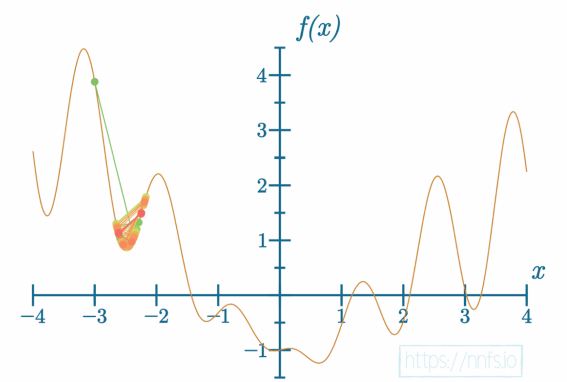

Um dieses Problem zu vermeiden gibt es **Momentum**:

Momentum kann man sich wie Trägheit eines Balles vorstellen. Wir rollen ihn quasi Bergabhang und stoßen ihn noch zusätzlich an, damit er kleine Hügel einfach überrollt, also quasi lokale Minimas überspringt. Aber auch hier darf man natürlich nicht zu viel Momentum mitgeben:

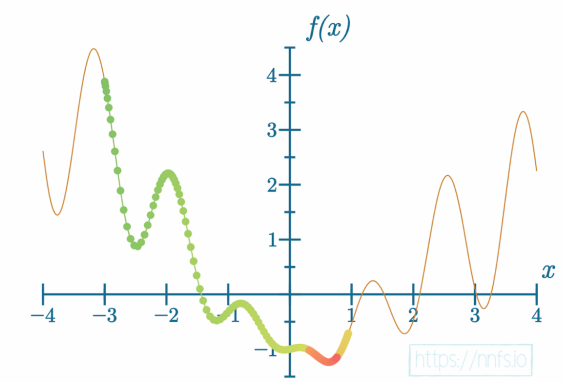

Am besten ist also eine Lernrate die nicht zu hoch ist, als dass man ausversehen aus dem Globalen rausspringt und nicht zu klein, damit man nicht in einem lokalen hängen bleibt. Daher wäre eine Lernrate gut die sich über die Zeitverlangsamt/Verkleinert. Ist die Lernrate zu groß kann eine **"Gradienten Explosion"** entstehen. Dabei geht der Loss wieder hoch anstatt weiter zu sinken. Zusätzlich kann auch noch der Gradient währenddessen größer werden, sodass Float Overflows entstehen. Muss man ein NN mehrere Wochen trainieren kann das sehr ärgerlich sein. Manchmal kann man wohl mitten im Training dagegensteuern.

> Generell gilt, wählt man die $LR$ gut, kann der Trainingsprozess massiv verkürzt werden.

### Das Dilemma mit den Hyperparametern
Hyperparameter wie die $LR$, Anz. Schichten, Anz. Neuronen oder die Batch-Größe sind generell schwer perfekt zu treffen und sind immer von den Daten und sich gegenseitig abhängig. Derzeit scheint man davon auszugehen, dass Intuition hier die beste Möglichkeit wäre. Man scheint hier noch nix besseres gefunden zu haben.
https://towardsdatascience.com/machine-learning-algorithms-and-the-art-of-hyperparameter-selection-279d3b04c281

> Die richtige Hyperparameter können das Training massiv verkürzen

> Hyperparameter sind das Einzige was im Moment nicht erlernt werden kann und von Experten festgelegt wird. Hier gibt es lediglich Optimierungsalgorithmen die Iterativ oder Random vorgehen.

Fürs Erste während des Trainings beobachten was passiert und dann mit den Hyperparametern rumspielen.

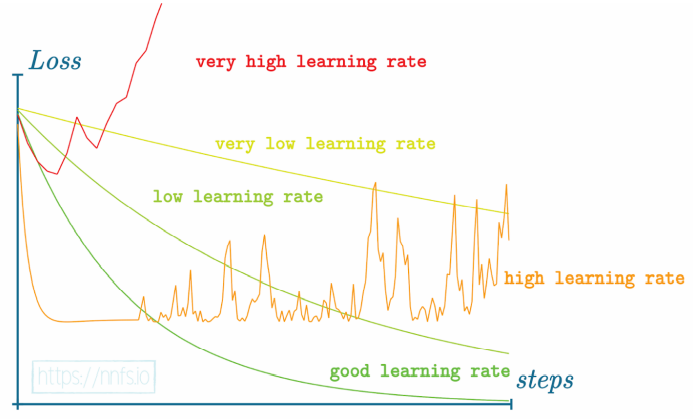

In [58]:
# geringere Lernrate 0.9
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(0.9)

for epoch in range(100001): #also 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0 acc: 0.363 loss: 1.099
epoch: 100 acc: 0.400 loss: 1.083
epoch: 200 acc: 0.417 loss: 1.066
epoch: 300 acc: 0.413 loss: 1.064
epoch: 400 acc: 0.423 loss: 1.063
epoch: 500 acc: 0.437 loss: 1.060
epoch: 600 acc: 0.437 loss: 1.055
epoch: 700 acc: 0.440 loss: 1.047
epoch: 800 acc: 0.463 loss: 1.035
epoch: 900 acc: 0.480 loss: 1.022
epoch: 1000 acc: 0.407 loss: 1.023
epoch: 1100 acc: 0.413 loss: 1.017
epoch: 1200 acc: 0.417 loss: 1.016
epoch: 1300 acc: 0.443 loss: 1.012
epoch: 1400 acc: 0.440 loss: 1.010
epoch: 1500 acc: 0.433 loss: 1.008
epoch: 1600 acc: 0.453 loss: 1.024
epoch: 1700 acc: 0.443 loss: 1.006
epoch: 1800 acc: 0.480 loss: 1.017
epoch: 1900 acc: 0.477 loss: 1.008
epoch: 2000 acc: 0.437 loss: 0.996
epoch: 2100 acc: 0.443 loss: 0.976
epoch: 2200 acc: 0.523 loss: 0.971
epoch: 2300 acc: 0.473 loss: 0.975
epoch: 2400 acc: 0.530 loss: 0.940
epoch: 2500 acc: 0.543 loss: 0.963
epoch: 2600 acc: 0.490 loss: 0.941
epoch: 2700 acc: 0.497 loss: 0.928
epoch: 2800 acc: 0.537 loss: 0.9

Das sieht schon besser aus.

In [70]:
# NOCH geringere Lernrate 0.5
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(0.5)

for epoch in range(100001): #also 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)

epoch: 0 acc: 0.293 loss: 1.099
epoch: 100 acc: 0.443 loss: 1.094
epoch: 200 acc: 0.427 loss: 1.067
epoch: 300 acc: 0.433 loss: 1.058
epoch: 400 acc: 0.440 loss: 1.057
epoch: 500 acc: 0.440 loss: 1.057
epoch: 600 acc: 0.440 loss: 1.056
epoch: 700 acc: 0.447 loss: 1.056
epoch: 800 acc: 0.447 loss: 1.056
epoch: 900 acc: 0.440 loss: 1.055
epoch: 1000 acc: 0.443 loss: 1.055
epoch: 1100 acc: 0.447 loss: 1.055
epoch: 1200 acc: 0.450 loss: 1.055
epoch: 1300 acc: 0.450 loss: 1.055
epoch: 1400 acc: 0.450 loss: 1.054
epoch: 1500 acc: 0.450 loss: 1.054
epoch: 1600 acc: 0.447 loss: 1.054
epoch: 1700 acc: 0.447 loss: 1.053
epoch: 1800 acc: 0.447 loss: 1.052
epoch: 1900 acc: 0.447 loss: 1.051
epoch: 2000 acc: 0.443 loss: 1.050
epoch: 2100 acc: 0.453 loss: 1.047
epoch: 2200 acc: 0.443 loss: 1.045
epoch: 2300 acc: 0.457 loss: 1.042
epoch: 2400 acc: 0.467 loss: 1.038
epoch: 2500 acc: 0.470 loss: 1.032
epoch: 2600 acc: 0.463 loss: 1.025
epoch: 2700 acc: 0.453 loss: 1.018
epoch: 2800 acc: 0.413 loss: 1.0

Mit $LR = 0,5$ war der Loss sehr sprunghaft.

## Learning Rate Decay
Wie man sehen kann ist eine konstante Lernrate nur die beste Lösung wenn wir direkt genau die richtige $LR$ finden. Daher kommen wir zur **Reibung** wovon wir zuvor gesprochen haben. Wir verändern die Lernrate über die Zeit und stellen so eine Art Trägheit und Reibung dar. Der Ball rollt so hoffentlich über die lokalen Minimas und bleibt im Globalen hängen. Er rollt schnell los und wird dann immer langsamer.

Decay kommt eig von "Zerfall" von Radioaktiven Stoffen, aber hier ist ein Abfall der Lernrate über Zeit gemeint.
Es gibt zwei Wege wie man eine $LR$ Decay bauen kann:

1. Man bindet die $LR$ an den Loss und verändert ihn so entsprechend
2. Man verkleinert die $LR$ einfach je Epoche oder je Batch.

Variante 2 kann man wie folgt implementieren:

S.271

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [72]:
starting_lr = 1
decay_lr = 0.1
step = 1 # Epoche, oder Batch

lr = starting_lr * (1 / (1 + decay_lr * step))
lr

0.9090909090909091

$ LR = LR_{start}* \frac{1}{1 + decay_{LR} * step}$

Mit jedem $step$ also mit jeder Epoche wird die Lernrate immer kleiner. Bei Epoche 500 hätte der Bruch bereits den Wert $0,0002$ das $*$ der $LR_{start}$ ergibt dann zum Ende hin eine sehr kleine Lernrate von $0,0002$ bei einem Start von $1$.

Text(0, 0.5, 'LernRate')

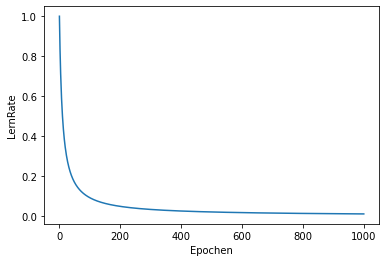

In [49]:
starting_lr = 1
decay_lr = 0.1 # Eine Decay Rate von 0,1 wird wohl als recht Aggressive angesehen
step = np.linspace(0, 1000, 1000, dtype=int)
lr = starting_lr * (1 / (1 + decay_lr * step))

plt.plot(step,lr)
plt.xlabel("Epochen")
plt.ylabel("LernRate")

Diese Implementierung wird auch *1/t Decaying* oder "Exponentielle Abnahme" genannt. 

"1/t decaying" beschreibt eine Abnahme eines Wertes, die proportional zum Kehrwert der Zeit ist. Das bedeutet, dass der Wert mit zunehmender Zeit langsamer abnimmt. 

Die 1/t decay ist in vielen Bereichen der Physik und Mathematik zu finden, wie zum Beispiel in der Akustik, der Optik oder der Elektronik. Sie ist ein wichtiges Konzept für die Beschreibung von Phänomenen, die sich im Laufe der Zeit verändern.

## Implementierung im Optimizer
Wir machen die Decay Rate zum neuen Hyperparameter und fügen sie unserem SGD Optimierer hinzu:

In [8]:
class Optimizer_SGD:

    def __init__(self, lr=1, decayRate=0):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):
        layer.weights += -self.current_lr * layer.dweights
        layer.biases += -self.current_lr * layer.dbiases

    def update_step(self):
        self.step += 1

In [22]:
# NOCH geringere Lernrate 0.5
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(decayRate=0.001)

for epoch in range(100001): #also 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.347 loss: 1.099 lr: 1.000
epoch: 100 acc: 0.387 loss: 1.091 lr: 0.910
epoch: 200 acc: 0.413 loss: 1.079 lr: 0.834
epoch: 300 acc: 0.413 loss: 1.077 lr: 0.770
epoch: 400 acc: 0.403 loss: 1.076 lr: 0.715
epoch: 500 acc: 0.403 loss: 1.074 lr: 0.667
epoch: 600 acc: 0.400 loss: 1.072 lr: 0.625
epoch: 700 acc: 0.397 loss: 1.069 lr: 0.589
epoch: 800 acc: 0.423 loss: 1.066 lr: 0.556
epoch: 900 acc: 0.427 loss: 1.061 lr: 0.527
epoch: 1000 acc: 0.447 loss: 1.056 lr: 0.500
epoch: 1100 acc: 0.470 loss: 1.051 lr: 0.476
epoch: 1200 acc: 0.467 loss: 1.044 lr: 0.455
epoch: 1300 acc: 0.473 loss: 1.037 lr: 0.435
epoch: 1400 acc: 0.477 loss: 1.029 lr: 0.417
epoch: 1500 acc: 0.490 loss: 1.021 lr: 0.400
epoch: 1600 acc: 0.487 loss: 1.012 lr: 0.385
epoch: 1700 acc: 0.497 loss: 1.003 lr: 0.371
epoch: 1800 acc: 0.507 loss: 0.994 lr: 0.357
epoch: 1900 acc: 0.510 loss: 0.986 lr: 0.345
epoch: 2000 acc: 0.523 loss: 0.978 lr: 0.333
epoch: 2100 acc: 0.533 loss: 0.970 lr: 0.323
epoch: 2200 acc: 0.547

Scheint wieder in einem lokalen Minimum hängen geblieben zu sein.

> Am besten wäre es wenn wir Hyperparameter finden womit wir möglichst wenig rechnen müssen für möglichst wenig Loss

S.280

War oben anscheinden doch kein Momentum, das kommt jetzt erst...

### Recap Gradient

> Der Gradient zeigt gerade mit dem SGD in jeder Epoch in die Richtung des steilsten Antiegs der Loss(x). Daher wird der Gradient negiert, damit er in den steilsten Abstieg zeigt.

> Dies kann aber in einem Step/Epoche dazu führen dass der aktuelle Gradient auf ein lokales Minima zeigt.

Der Gradient würde in so einer Epoch zwar den Loss veringern, aber stecken bleiben. Mitunter deswegen verwenden wir ja die Lernrate, damit wir z.B. nicht zu stark overshooten.

> Nun wollen wir aber genau im richtigen Minima hängen bleiben und es ist nicht möglich das globale Minima mathematisch zu erkennen. Wir können uns nur vortasten. Deswegen müssen wir Decay Algorithmen mit Momentum bauen:

## SGD mit Momentum
Beim SGD mit Momentum wird von den Vergangenen Gradienten ein Rolling Average gebildet und mit dem aktuellen Gradienten der Epoche kombiniert.

> Der Vorteil: Dadurch das wir mit dem Average die zuvorigen Schritte mitnehmen, reduzieren wir die Wahrscheinlichkeit in einem lokalen Minimum hin und her zu schießen.

Aber hier kann es auch dazukommen das uns Momentum über das Globale schießt.

**Implementierung:** Wir nehmen einen Prozentteil von den letzten Gradienten (Richtung der letzten Parameter Updates) und ziehen diesen vom aktuellen Gradient ab. Genau wie vorher multiplizieren wir den aktuellen Gradient zusätzlich wieder mit einer $LR$. Zusammen wird dies das Update der aktuellen Epoche.

> Je größer das Momentum ist, desto geringer wird das Update die Richtung wechseln.

> Wird das Momentum zu hoch gewichtet, kann das NN das globale Minima evtl. ebenfalls nicht finden.

In [ ]:
# Implementierung innerhalb des Optimizers, am Beispiel der Weights:
# momentum ist ein Wert im Intervall [0,1]
weights_updates = self.momentum * layer.weight_momentums - (self.current_lr * layer.dweights)

# weight_momentums startet erstmal mit Null und wir dann auf das Update der letzten Epoche gesetzt
layer.weight_momentums = weights_updates

Implementierung in der Optimizer Klasse:

In [28]:
class Optimizer_SGD:

    def __init__(self, lr=1, decayRate=0, momentum=0):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.momentum = momentum # neuer HyperParameter

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        if self.momentum:
            # wenn ein layer keine weight_momentums hat erstellen mit Nullen:
            if not hasattr(layer, "weight_momentums"):
                layer.weight_momentums = np.zeros_like(layer.weights)
                #wenn die nicht für weights gibt, auch nicht für biases:
                layer.bias_momentums = np.zeros_like(layer.biases)
        
            # Weights Momentums
            weight_updates = self.momentum * layer.weight_momentums -(self.current_lr * layer.dweights)
            layer.weight_momentums = weight_updates #übergabe für nächste Epoche

            # Biases Momentums
            bias_updates = self.momentum * layer.bias_momentums -(self.current_lr * layer.dbiases)
            layer.bias_momentums = bias_updates

        else: #falls kein momentum und nur lr und aktueller Gradient
            weight_updates = -self.current_lr * layer.dweights
            bias_updates = -self.current_lr * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def update_step(self):
        self.step += 1

Erster Guess: Die Performance sollte wesentlich besser sein.

In [50]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(decayRate=0.001, momentum=0.9)

for epoch in range(100001): # 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # loss
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.367 loss: 1.099 lr: 1.000
epoch: 100 acc: 0.480 loss: 1.030 lr: 0.910
epoch: 200 acc: 0.437 loss: 0.884 lr: 0.834
epoch: 300 acc: 0.683 loss: 0.619 lr: 0.770
epoch: 400 acc: 0.807 loss: 0.504 lr: 0.715
epoch: 500 acc: 0.853 loss: 0.410 lr: 0.667
epoch: 600 acc: 0.823 loss: 0.407 lr: 0.625
epoch: 700 acc: 0.890 loss: 0.293 lr: 0.589
epoch: 800 acc: 0.873 loss: 0.324 lr: 0.556
epoch: 900 acc: 0.930 loss: 0.244 lr: 0.527
epoch: 1000 acc: 0.930 loss: 0.207 lr: 0.500
epoch: 1100 acc: 0.937 loss: 0.187 lr: 0.476
epoch: 1200 acc: 0.947 loss: 0.172 lr: 0.455
epoch: 1300 acc: 0.947 loss: 0.161 lr: 0.435
epoch: 1400 acc: 0.950 loss: 0.152 lr: 0.417
epoch: 1500 acc: 0.950 loss: 0.144 lr: 0.400
epoch: 1600 acc: 0.953 loss: 0.139 lr: 0.385
epoch: 1700 acc: 0.950 loss: 0.133 lr: 0.371
epoch: 1800 acc: 0.950 loss: 0.129 lr: 0.357
epoch: 1900 acc: 0.960 loss: 0.125 lr: 0.345
epoch: 2000 acc: 0.960 loss: 0.122 lr: 0.333
epoch: 2100 acc: 0.963 loss: 0.120 lr: 0.323
epoch: 2200 acc: 0.967

Wesentlich stabiler und direkt ins globale Minimum gestürzt!

In [36]:
X[3]

array([0.01625573, 0.02557391])

In [37]:
y[3]

0

In [51]:
dense1.forward(X[3])
activation1.forward(dense1.output)
dense2.forward(activation1.output)
# loss
loss_activation.forward(dense2.output, np.array([0]))
print(loss_activation.output)

[[0.86208492 0.13693984 0.00097524]]


### Fazit zu SGD mit Momentum
Ist wohl einer der beiden populärsten Optimierer. Der Konkurrent ist der *"Adam Optimizer"*, der später betrachtet wird. Als nächstes kommt erstmal der *"AdaGrad"*.

Der "Adam Optimizer" und der "SGD mit Momentum" sind beide Optimierungsalgorithmen, die häufig beim Training von neuronalen Netzen verwendet werden. Jeder dieser Algorithmen hat seine eigenen Stärken und Schwächen und kann in verschiedenen Situationen nützlich sein. Hier sind einige Überlegungen, die bei der Entscheidung, welcher Optimierungsalgorithmus verwendet werden soll, hilfreich sein können:

Adam Optimizer: Der Adam Optimizer ist ein relativ neuer Optimierungsalgorithmus, der im Vergleich zum SGD mit Momentum in der Regel eine schnellere Konvergenz aufweist und sich besser für sehr große Datenmengen eignet. Es ist auch weniger anfällig für lokale Minima. Der Adam Optimizer ist in der Regel eine gute Wahl für Probleme mit vielen Daten und/oder vielen Parametern.

SGD mit Momentum: Der SGD mit Momentum ist ein älterer Optimierungsalgorithmus, der in der Regel eine etwas stabilere Konvergenz als der Adam Optimizer aufweist, insbesondere bei kleineren Datenmengen. Erstmals in den späten 1960er Jahren von Boris T. Polyak in seiner Arbeit "Some Methods of Speeding Up the Convergence of Iteration Methods" vorgeschlagen. Es kann auch einfacher zu trainieren sein, da es weniger Hyperparameter gibt, die optimiert werden müssen. Der SGD mit Momentum ist in der Regel eine gute Wahl für Probleme mit kleineren Datenmengen und/oder einfacheren Modellen.

## AdaGrad | Optimizer
S. 291

Der Name "AdaGrad" leitet sich von "adaptive gradient" ab, da der Algorithmus eine adaptive Lernrate verwendet, die auf den Gradienten angepasst wird.

Der AdaGrad-Algorithmus ist ein Optimierungsalgorithmus, der in der Regel für das Training von neuronalen Netzen verwendet wird. Er wurde 2011 von John Duchi, Elad Hazan und Yoram Singer vorgeschlagen. Der AdaGrad-Algorithmus ist besonders nützlich für Probleme mit dünn besetzten Merkmalsvektoren oder für die Verarbeitung von Text- oder Bildsequenzen. Es kann jedoch auch langsame Konvergenzgeschwindigkeiten aufweisen, wenn es für tiefere Netzwerke oder für Probleme mit vielen Parametern verwendet wird.

Der AdaGrad-Algorithmus ist ein adaptiver Lernrate-Algorithmus, der die Lernrate für jeden Parameter in jedem Schritt anpasst. Es soll eine Lernrate pro Parameter geben und nicht eine globale $LR$.
Die Idee hinter dem AdaGrad-Algorithmus ist es, die Lernrate für Parameter mit seltenen Updates zu erhöhen und die Lernrate für Parameter mit häufigen Updates zu reduzieren. Dadurch kann der AdaGrad-Algorithmus besser mit ungleichmäßig verteilten und schwach strukturierten Daten umgehen.

> Updates sollen so normalisiert werden

Einige Weights steigen im Training viel stärker an als andere, was grundlegend eine schlechte Idee ist, da es bedeutet da weniger Neuronen verwendet werden, da sie so deaktiviert werden.

AdaGrad normalisiert die Parameter Updates, indem es eine Historie der Updates hält. 

> Desto größer die Summe vergangner Updates in eine Richtung ist, desto kleiner sind die zukünftigen Updates in diese Richtung. So werden weniger berücksichtigte Biases und Weights mehr benutzt und effektiv mehr Neuronen verwendet und das Netzwerk gleichmäßiger belastet.


$cache$ += $Gradient_{Parameter} ^2$

"Epsilon" wird meistens auf den Wert "0.000001" gesetzt als Default. Die sqrt nehmen wir zusätzlich um negative Werte zu vermeiden, auch um das Wachstum zu begrenzen.

$ Parameter_{Update} = LR * \frac{Gradient}{ \sqrt{cache} + ε} $

In [ ]:
cache += parm_gradient ** 2 # Cache der letzten Gradienten ohne die Negativen
parm_update = lr * parm_gradient / (sqrt(cache) + epsilon) #epsilon um 0 Teilen zu verhindern

> So werden Parameter mit kleinere Gradienten langsamer veringert als Größere

> Durch den Cache erhalten wir nun wirklich eine Art Moving Average

In [55]:
# Implementierung
class Optimizer_SGD:

    def __init__(self, lr=1, decayRate=0, epsilon=1e-7):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        # self.momentum = momentum # alter HyperParameter
        self.epsilon = epsilon # neuer HyperParameter

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        # statt weight_momentums, machen wir nun parm_caches
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
    
        # Update Cache mit Current Gradient^2
        layer.weight_cache += layer.dweights ** 2
        layer.bias_cache += layer.dbiases ** 2

        # Normalisierung der Updates dieser Epoche mit Cache Historie
        layer.weights += -self.current_lr * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_lr * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def update_step(self):
        self.step += 1

Testen!

In [57]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_SGD(decayRate=0.001) #epsilon ist bereits im kanonischen gesetzt

for epoch in range(100001): # 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # loss
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr:.3f}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.373 loss: 1.099 lr: 1.000
epoch: 100 acc: 0.417 loss: 1.005 lr: 0.910
epoch: 200 acc: 0.487 loss: 0.968 lr: 0.834
epoch: 300 acc: 0.467 loss: 0.943 lr: 0.770
epoch: 400 acc: 0.557 loss: 0.917 lr: 0.715
epoch: 500 acc: 0.563 loss: 0.889 lr: 0.667
epoch: 600 acc: 0.573 loss: 0.891 lr: 0.625
epoch: 700 acc: 0.593 loss: 0.841 lr: 0.589
epoch: 800 acc: 0.640 loss: 0.823 lr: 0.556
epoch: 900 acc: 0.657 loss: 0.807 lr: 0.527
epoch: 1000 acc: 0.667 loss: 0.780 lr: 0.500
epoch: 1100 acc: 0.677 loss: 0.752 lr: 0.476
epoch: 1200 acc: 0.687 loss: 0.725 lr: 0.455
epoch: 1300 acc: 0.710 loss: 0.703 lr: 0.435
epoch: 1400 acc: 0.747 loss: 0.684 lr: 0.417
epoch: 1500 acc: 0.753 loss: 0.665 lr: 0.400
epoch: 1600 acc: 0.760 loss: 0.650 lr: 0.385
epoch: 1700 acc: 0.750 loss: 0.636 lr: 0.371
epoch: 1800 acc: 0.757 loss: 0.622 lr: 0.357
epoch: 1900 acc: 0.760 loss: 0.608 lr: 0.345
epoch: 2000 acc: 0.763 loss: 0.595 lr: 0.333
epoch: 2100 acc: 0.770 loss: 0.583 lr: 0.323
epoch: 2200 acc: 0.787

### Fazit AdaGrad
Der Adaptive Gradient ist schlechter als SGD+Momentum in unserem Trainingsdatensatz und brauchte auch mehr Epochen. Lief aber ähnlich stabil wie Momentum. Langsamer aber stabiler als nur mit dem Exponentiellen Decay.

## RMSProp | Root Mean Square Propagation
RMSProp steht für *"Root Mean Square Propagation"*. Genau AdaGrad geht es hier wieder um eine Adaptive $LR$ die sich dem Fokus der Parameter anpasst nur einfach anders berechnet.

Während AdaGrad die Historie / "Cache" wie folgt berechnet:

$cache$ += $gradient^2$

Nutzt RMSProp folgendes Vorgehen:

$ cache = rho * cache + (1 - rho) * gradient^2 $

Für die Updates wird hinterher genau wie bei AdaGrad ein Epsilon etc. genutzt:

$ Parameter_{Update} = LR * \frac{Gradient}{ \sqrt{cache} + ε} $

Es ist eine Art Kombination aus dem SGD+Momentum und AdaGrad. So behalten wir mit dem Parameter $rho$ genau wie beim Parameter $Momentum$ die Richtung der letzten Schritte bei und hoffern über Minimas, haben aber auch die Smoothness von AdaGrad durch die Historie der letzten Gradienten durch den Cache. Dadurch verändert sich die Lernrate ebenfalls smoother.

Anstatt einfach nur wie bei AdaGrad konstant quadrierte vergangen Gradienten zu adden, benutzt RMSProp einen MovingAverage über den Cache.

**Geschichte:** RMSProp wurde 2012 von *"Geoffrey Hinton"* et al. entwickelt und auf der CVPR vorgestellt. Entwickelt haben die 4 Forscher den Optimierer da er bei einigen Fällen im Vergleich zu AdaGrad und SGD+Momentum bessere Ergebnisse liefert. 

Seit der Vorstellung von RMSProp hat der Algorithmus in der Praxis breite Anwendung gefunden und wird oft als Standardmethode für die Optimierung von neuronalen Netzen verwendet. Hinton hat den Algorithmus nie richtig veröffentlicht dennoch ist der Algorithmus so weiter verbreitet. Dafür ist der Optimierer auch berühmt.



In jeder Epoche bekommt der Cache ein Update, dass besteht aus einem Teil des letzten und einem Teil des aktuellen quadrierten Gradienten. Der neue Hyperparameter $rho$ ist die Cache-Zerfall-Rate. RMSProp hat selbst bei kleinen Gradienten-Updates so viel Momentum, dass man eine $LR$ von $1$ viel zu hoch ist.

Daher wird eine $LR=0,001$ in der Praxis verwendet. In den Meisten Machine Learning Frameworks ist dies auf der Default Wert genau aus diesem Grund.

In [11]:
class Optimizer_RMSProp:

    def __init__(self, lr=0.001, decayRate=0, epsilon=1e-7, rho=0.9):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.epsilon = epsilon # neuer HyperParameter
        self.rho = rho

    # 1/t LR Decay
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        # Cache 0 Instanziierung
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
    
        # Update Cache mit Current Gradient^2 und rho
        layer.weight_cache = self.rho * layer.weight_cache + (1 -self.rho) * (layer.dweights ** 2)
        layer.bias_cache = self.rho * layer.bias_cache + (1 -self.rho) * (layer.dbiases ** 2)

        # Normalisierung der Updates dieser Epoche mit Cache und AdaGrad Bruch-Verfahren
        layer.weights += -self.current_lr * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_lr * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def update_step(self):
        self.step += 1

In [20]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_RMSProp(decayRate=0.001, lr=0.02, rho=0.9) #epsilon ist bereits im kanonischen gesetzt

for epoch in range(100001): # 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # loss
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.280 loss: 1.099 lr: 0.02
epoch: 100 acc: 0.487 loss: 0.984 lr: 0.018198362147406735
epoch: 200 acc: 0.550 loss: 0.899 lr: 0.016680567139282735
epoch: 300 acc: 0.653 loss: 0.832 lr: 0.015396458814472672
epoch: 400 acc: 0.713 loss: 0.769 lr: 0.014295925661186561
epoch: 500 acc: 0.750 loss: 0.705 lr: 0.0133422281521014
epoch: 600 acc: 0.763 loss: 0.655 lr: 0.012507817385866166
epoch: 700 acc: 0.747 loss: 0.620 lr: 0.011771630370806356
epoch: 800 acc: 0.770 loss: 0.586 lr: 0.011117287381878822
epoch: 900 acc: 0.787 loss: 0.565 lr: 0.010531858873091101
epoch: 1000 acc: 0.777 loss: 0.555 lr: 0.010005002501250623
epoch: 1100 acc: 0.790 loss: 0.527 lr: 0.009528346831824679
epoch: 1200 acc: 0.810 loss: 0.511 lr: 0.009095043201455207
epoch: 1300 acc: 0.800 loss: 0.493 lr: 0.008699434536755112
epoch: 1400 acc: 0.800 loss: 0.483 lr: 0.008336807002917883
epoch: 1500 acc: 0.820 loss: 0.471 lr: 0.008003201280512205
epoch: 1600 acc: 0.830 loss: 0.455 lr: 0.007695267410542516
epoch: 170

Beste Ergebnis bis jetzt. Aber hier hat $LR=0,001$ nicht geklappt, deswegen hab ich das erhöht. Nach etwas tweaken mit den 3 Parametern ist das nun das beste Setting.

### Fazit: RMSProp
Der Root Mean Square Propagation - Optimierer kombiniert die Vorteile vom AdaGrad und SGD+Momentum und ist bis dato der beste Algorithmus den wir angeschaut haben. Aber auch in der Praxis scheint er neben dem "Adam"-Optimizer sehr beliebt zu sein. Wenn man wenige Epochen hat ist eine $LR$ von $0,001$ als Best Practice nun auch verständlich.

# Adam | Adaptive Momentum
S. 302: Adam ist der derzeit **meist genutzte** Optimierer und baut auf RMSProp auf und baut das Momentum Konzept von *SGD+Momentum* wieder ein. 

**Geschichte**: Er wurde im Jahr 2014 von Diederik P. Kingma und Jimmy Lei Ba in ihrem Paper "Adam: A Method for Stochastic Optimization" vorgestellt. Die Autoren sind Forscher im Bereich maschinelles Lernen und arbeiteten zu dieser Zeit am Montreal Institute for Learning Algorithms (MILA) und an der Universität von Montreal. Der Adam-Optimizer ist ein beliebter Optimierungsalgorithmus für neuronale Netze und wird in vielen Anwendungen des maschinellen Lernens eingesetzt.

Der Adam-Optimizer hat jedoch einige Vorteile gegenüber RMSProp, die ihn in vielen Fällen zu einem bevorzugten Optimierungsalgorithmus machen.

Einer der Hauptvorteile von Adam gegenüber RMSProp ist, dass Adam sowohl den aktuellen Gradienten als auch die vergangenen Gradienten berücksichtigt, um die Lernrate anzupassen. Das bedeutet, dass Adam im Allgemeinen schneller gegenüber dem RMSProp-Konvergenzverhalten ist. Adam ist auch robust gegenüber verschiedenen Lernraten und funktioniert gut bei Datensätzen mit großen Gradientenvariationen.

Ein weiterer Vorteil von Adam ist, dass er adaptivere Lernraten als RMSProp ermöglicht. Dadurch kann er schneller konvergieren und eine bessere allgemeine Leistung erzielen. Allerdings hat Adam tendenziell mehr Hyperparameter als RMSProp, was möglicherweise seine Anwendung erschwert.

### Formel

Anstatt von Current Gradients werden wieder "Momentums" wie bei SGD anwendet, um dann je Parameter adaptive LRs mit einem $cache$ zu ermöglichen wie in RMSProp. Zusätzlich hat er einen "Bias Korrektur"-Mechanismus, der jedoch nichts mit den "Biases" zu tun hat.

Dieser Bias wird verwendet um die anfangs 0 gesetzten $cache$ und $momentum$ Parameter warm zu kriegen vor den Epochen. Um dies hinzukriegen werden beide durch einen weiteren Parameter geteilt:

$1-beta^{step}$

Während die Epochen steigen wird der Term $beta^{step}$ immer kleiner, da $beta$ immer kleiner $1,0$ gesetzt wird.
Das ähnelt dann wieder sehr einem *"Exponentiellen Zerfall"*:

Text(0, 0.5, 'beta=0.9^x')

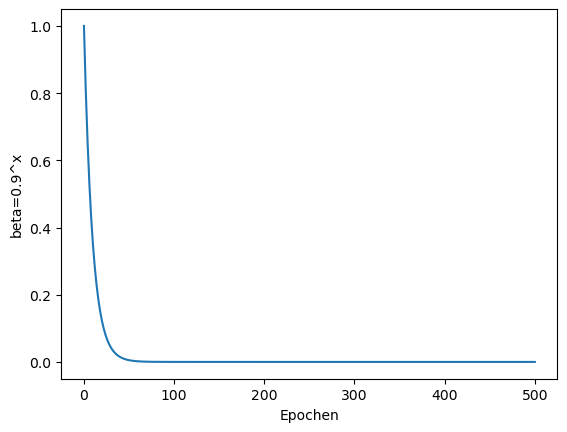

In [44]:
beta = 0.9
x = np.linspace(0, 500, 500, dtype=int)
y = beta ** x
plt.plot(x,y); plt.xlabel("Epochen"); plt.ylabel(f"beta={beta}^x")

In [46]:
# sobald Beta während des Trainings 1 wird, wird der Term 1
1 ** 500

1

Kommen wir wieder zurück zu $1-beta^{step}$. Über das Training wird der gesamte Term hinterher $1$: 

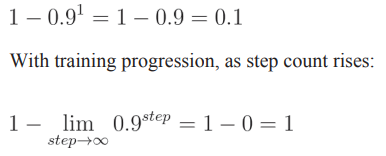

Text(0.5, 1.0, '1. beta=0.9 für $Momentum$')

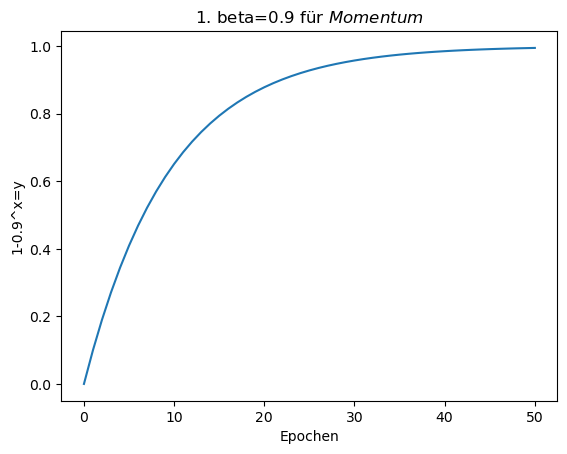

In [91]:
beta = 0.9
x = np.linspace(0, 50, 50, dtype=int)
y = 1 - beta ** x
plt.plot(x,y); plt.xlabel("Epochen"); plt.ylabel(f"1-{beta}^x=y"); plt.title(f"1. beta={beta} für $Momentum$")

Schon nach 50 Epochen ist der gesamte Term mit $0.9$ bereits $1$.

Für $cache$ und $momentum$ werden jeweils eigene $beta$'s erstellt. Diese Terme werden dann "vorgeschnallt" (Koeffizienten) und "erwärmen" die beiden, bereits vor dem Training. Für das $momentum$ wird ein Wert von $0.9$ gewählt und für den $cache$ einer von $0.999$, so wird der $momentum$ erst nach 50 Epochen normal und der $cache$ quasi linear über viele epochen:

Text(0.5, 1.0, '2. beta=0.999 für $Cache$')

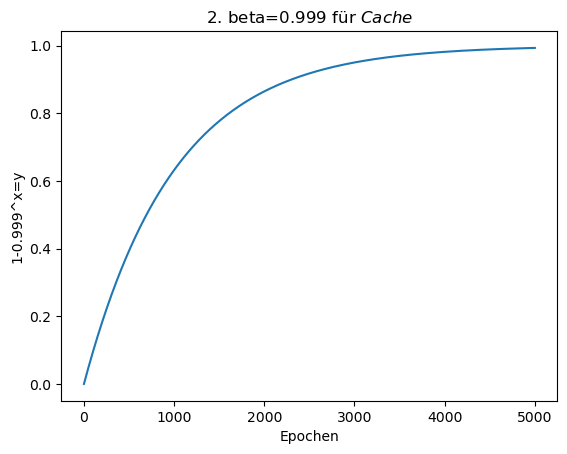

In [98]:
beta = 0.999
x = np.linspace(0, 5000, 5000, dtype=int)
y = 1 - beta ** x
plt.plot(x,y); plt.xlabel("Epochen"); plt.ylabel(f"1-{beta}^x=y"); plt.title(f"2. beta={beta} für $Cache$")

Durch anschließendes korrigieren/aufwärmen der $momentums$ mit beta1 werden die Dinger für die ersten 50 Epochen aufgewärmt.

Die $momentums$ werden in der ersten Epoche einfach durch $0,1$ geteilt und somit in ihrer Wirkung **verzehnfacht**!

In [2]:
# Implementierung
class Optimizer_Adam:

    def __init__(self, lr=0.001, decayRate=0, epsilon=1e-7, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.epsilon = epsilon # neuer HyperParameter
        self.beta1 = beta1
        self.beta2 = beta2

    # 1/t LR Decay
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases eines Layers updaten
    def update_params(self, layer):

        # Cache 0-Initialisierung
        if not hasattr(layer, "weight_cache"):
            # wie bei RMSProp Cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            # wie bei SGD Momentums
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
    
        # Update Momentum mit Current Gradients und beta1's anstatt rho wie bei RMSProp
        layer.weight_momentums = self.beta1 * layer.weight_cache + (1 -self.beta1) * layer.dweights
        layer.bias_momentums = self.beta1 * layer.bias_cache + (1 -self.beta1) * layer.dbiases

        # Momentums korrigieren/anheizen mit 1 - beta^step, nach ca. 50 Steps normal groß, bei erster Epoche 10x 
        weight_momentums_corrected = layer.weight_momentums / (1 -self.beta1 **(self.step+1)) # + 1 weil in der ersten Epoche "0"
        bias_momentums_corrected =  layer.bias_momentums / (1 -self.beta1 **(self.step+1))

        # Update Cache mit Squared Current Gradients wie bei AdaGrad und beta2 anstatt rho wie bei RMSProp
        layer.weight_cache = self.beta2 * layer.weight_cache + (1 - self.beta2) * layer.dweights**2
        layer.bias_cache = self.beta2 * layer.bias_cache + (1 - self.beta2) * layer.dbiases**2

        # Cache korrigieren/anheizen mit beta2 wird wesentlich stärker als Momentums angeheizt! 1000x in der ersten Epoche
        # Erst in der 5000. Epoche normal "1"
        # Der Cache ist für die Normalisierung der Updates der Parameter zuständig, Am Anfang wird sehr stark normalisiert!
        # Am Ende muss nicht mehr so stark normalisiert werden und Parameter-Updates dürfen überproportional werden
        weight_cache_corrected = layer.weight_cache / (1 -self.beta2 **(self.step+1))
        bias_cache_corrected = layer.bias_cache / (1 -self.beta2 **(self.step+1))

        # Vanilla SGD Parameter Update und Normalisierung
        # Mit Square Root Cache vom AdaGrad Bruch-Verfahren
        layer.weights += -self.current_lr * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_lr * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def update_step(self):
        self.step += 1

### Fazit: AdaM
Geil!

Der Adaptive Momementum Optimierer kombiniert alle Vorteile von AdaGrad und SGD+Momentum noch effizienter als RMSProp, da er die Momentums zum Start anheizt sodass man quasi direkt über ein paar lokale Minimas drüber segelt.

Zusätzlich hat er die Vorteile von AdaGrad dadurch dass er Caches bildet, so gleitend die Gradienten normalisiert und  das Netzwerk gleich belastet und besser ausschöpft.

In [9]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(decayRate=0.000001, lr=0.05)

for epoch in range(100001): # 100.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # loss
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.307 loss: 1.099 lr: 0.05
epoch: 100 acc: 0.460 loss: 1.047 lr: 0.04999505049000149
epoch: 200 acc: 0.477 loss: 1.023 lr: 0.04999005197965605
epoch: 300 acc: 0.497 loss: 1.000 lr: 0.04998505446871385
epoch: 400 acc: 0.527 loss: 0.978 lr: 0.04998005795687521
epoch: 500 acc: 0.540 loss: 0.960 lr: 0.04997506244384053
epoch: 600 acc: 0.537 loss: 0.944 lr: 0.049970067929310344
epoch: 700 acc: 0.543 loss: 0.933 lr: 0.049965074412985325
epoch: 800 acc: 0.523 loss: 0.920 lr: 0.049960081894566244
epoch: 900 acc: 0.547 loss: 0.915 lr: 0.049955090373754
epoch: 1000 acc: 0.537 loss: 0.909 lr: 0.049950099850249605
epoch: 1100 acc: 0.547 loss: 0.907 lr: 0.0499451103237542
epoch: 1200 acc: 0.540 loss: 0.903 lr: 0.04994012179396903
epoch: 1300 acc: 0.540 loss: 0.904 lr: 0.04993513426059549
epoch: 1400 acc: 0.533 loss: 0.910 lr: 0.04993014772333506
epoch: 1500 acc: 0.533 loss: 0.916 lr: 0.04992516218188936
epoch: 1600 acc: 0.533 loss: 0.922 lr: 0.04992017763596011
epoch: 1700 acc: 0.517 

Krank!

War bis jetzt wieder das beste Ergebnis! Auffälig ist dass bei jedem Try sehr andere Ergebnise kommen. Was nicht ganz verwunderlich ist, da sowohl die Trainingsdaten als auch die Weights/Biases wo anders starten da sie zu Beginn random gewählt werden.

Ganz klar erkennbar ist das Verhalten von SGD+Momentum wo der Loss fast schon exponentiell einstürzt.

Man könnte noch mit den HyperParametern spielen, aber das  Ergebnis ist top.

## Adam (2014) vs RMSProp (2012) vs AdaGrad (2011) vs SGD+Momentum (2013)
Adam sei wohl nicht immer der beste aus verschiedenen Gründen aber man sollte immer erstmal mit Adam starten und nur zur Not wechseln. Genau aus diesem Grund ist Adam auch der Default von vielen Frameworks.

Hier eine Vergleichsgrafik der Performance der einzelnen aus dem "Adam Paper":

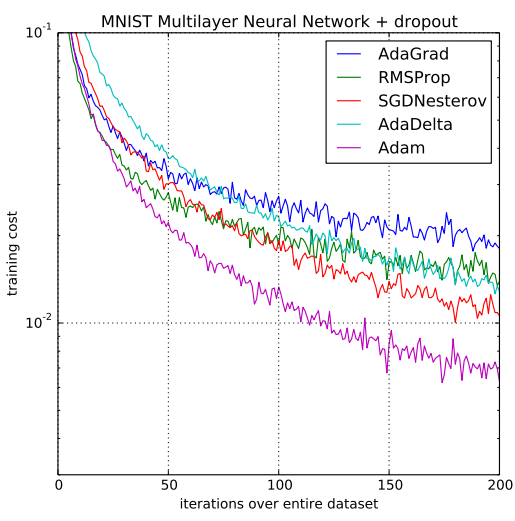 https://arxiv.org/pdf/1412.6980.pdf

$97,3$ % sind extrem gut aber leider nicht in der Sicht der Daten... 

Stichwort: Not in Batch?

S. 319

# Out-of-Sample Data
Eigentlich müsste es "Batch" heißen. 

Die Vielzahl an Parametern in NNs macht sie außergewöhnlich gut Daten zu fitten. Aber dies ist nicht nur ein Segen sondern auch ein Fluch. Wir dürfen nicht *"overfitten"* damit das Netz generalisiert und sich nicht zu sehr an ein spezifischen Batch anpasst. Diese Herausforderung muss stetig ausgeglichen werden. Die Frage ist:

Wann ist das NN zu gut?

## Overfitting = Auswendiglernen
Mit genügend Neuronen kann ein NN schnell einen ganzen Datensatz speichern. In anderen Worten es lernt die Trainingsbeispiele "auswendig".
Das Phänomen des Auswendiglernens von Daten durch neuronale Netzwerke wird als Overfitting bezeichnet. Overfitting tritt auf, wenn ein Modell so eng an die Trainingsdaten angepasst wird, dass es Schwierigkeiten hat, neue Daten richtig zu generalisieren.

In der Praxis kann das Auswendiglernen von Daten sehr schnell geschehen, insbesondere wenn das Modell eine hohe Kapazität hat und das Verhältnis von Trainingsdaten zu Parametern ungünstig ist. Wenn zum Beispiel ein Modell mehr Parameter hat als Trainingsdaten, kann es die Trainingsdaten perfekt auswendig lernen, was zu einer sehr hohen Trainingsgenauigkeit führen kann, aber die Generalisierungsleistung des Modells verschlechtert sich drastisch.

Ähnlich wie bei einem Menschen der in einer Bubble gefangen ist oder immer die gleiche Tätigkeiten ausübt. Interdisziplinär ist das beste für unser Gehirn. Deswegen ist wahrscheinlich auch Cross-Lernen gut. Overfitten bedeutet einfaches Auswendiglernen ohne das Konzept zu verstehen. Ähnlich wie bei einem Schüler der sich Formeln einprägt und runterschreibt aber nicht deren Logik versteht. Er wird in der einen Klausur sehr gut performen aber überall anders drastisch scheitern.

Um Overfitting zu vermeiden, ist es wichtig, Techniken wie Regularisierung und Datenaugmentation zu verwenden, um die Kapazität des Modells zu begrenzen und sicherzustellen, dass das Modell robust gegenüber neuen Daten ist.

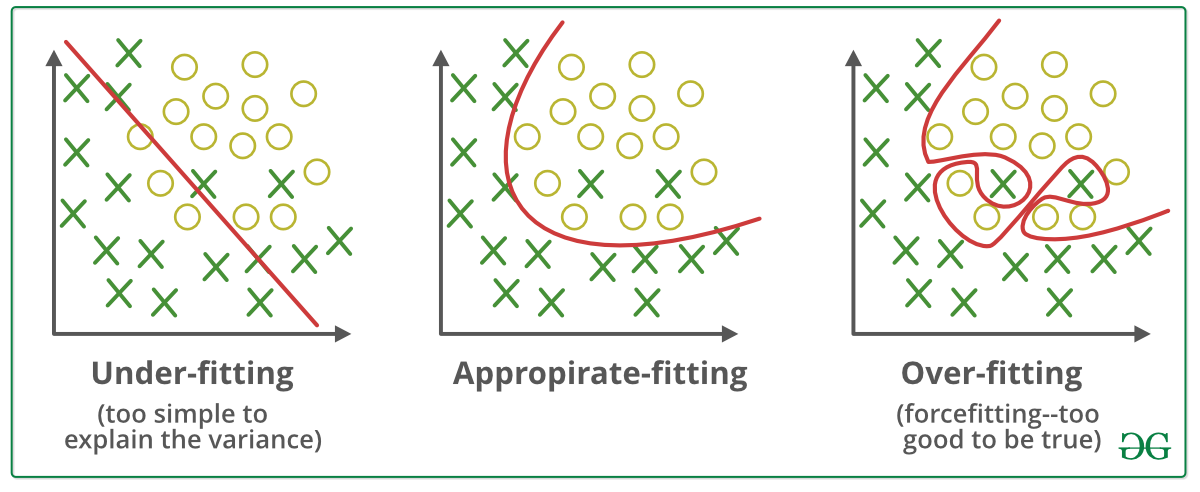

Generalisierung findet oben im mittleren Bild statt. Wie man sehen kann sind einige Samples fehlerhaft klassifiziert. Das ist aber nicht schlimm, da es bedeuten könnte das diese Samples einfach Ausreißer waren oder evtl. sogar falsch gelabeled wurden.

Ein NN wird laut dem UAT immer versuchen die Funktion für den Trainingsdatensatz zu approximieren. Mit genügend Parametern und Training wird das Modell früher oder später diese Funktion genau approxiemiert haben/overfitten. Für dieses Problem gibt es **2 Lösungen**:

1. Training an einem bestimmten Punkt stoppen
2. Mehr Trainingsdaten

### Overfitting erkennen?
Erkennen kann man overfitting indem man Batch in Trainings und Testdaten splitted. Der Loss beim Training sollte nur etwas besser sein als beim testen. Ist der Loss beim Training viel besser als beim Testen, hat man Overfitting. Ist der Loss bei beiden Datensätzen gleich miserabel spricht man von Underfitting.

**Probleme bei Zeitreihen:** Man muss beim splitten darauf achten dass keine Informationen durchsickern. Sollte man bei Zeitreihen zufällig Trainings und Testdaten wählen, könnte es passieren das man Samples picked die zeitlich in Trainings und Testdaten sehr na beinander lagen. Also hat man quasi das Overfitten beim Testen evtl. auch und kriegt zu gute Ergebenisse in beiden Datensätzen obwohl das NN nicht generalisiert hat. Bei Zeitreihen muss man wegen der Chronologie also eher bewusst mehrere Blöcke an Messungen im Batch nur dem Testen zu reservieren.

In [20]:
# Erzeugen von Teste-Daten
X_test, y_test = spiral_data(100, 3)

Hier könnten nun theoretisch aufgrund der zufälligen Beschaffenheit von **spiral_data()** wieder Training-Samples drin auftauchen. In diesem Fall ist die zufälligkeit aber i.O. da wir quasi die unter dem Problem liegen Funktion verwenden an die wir uns ja appoximieren wollen.
Unser Ziel ist es mit unserem NN die Funktion **spiral_data()** zu generalisieren.

Laut NNFS sei es hier gut auf seine Intuition zu hören.

In [71]:
# Forward Pas mit den neuen Test-Daten
dense1.forward(X_test)
activation1.forward(dense1.output)
dense2.forward(activation1.output)
loss = loss_activation.forward(dense2.output, y_test) # Loss berechnen

# Akkuranz berechnen
predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
accuracy = np.mean(predictions==y_test)

print(f'Test mit 100 Samples:   acc: {accuracy:.3f}, loss: {loss:.3f}')

Test mit 100 Samples:   acc: 0.803, loss: 2.056


In [75]:
predictions

array([2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0,
       0, 1, 2, 0, 0, 0, 2, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1, 2,
       2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2], d

In [76]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

In [77]:
predictions==y_test

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True, False,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Unser NN hat mit unbekannten Daten eine Akkuranz von $80,3$% erzielt. 

Ein gutes Ergebnis aber der Loss ist extrem hoch. Das kann ein Anzeichen dafür sein, dass das NN auf den Trainingsatz overfitted.

In [104]:
# Gib mir nur den Wert im Loss Output wo das NN hätte 1.0 sein müssen im Optimalfall
for outputArr in loss_activation.output:
    x = 0
    print(outputArr, outputArr[y_test[x]])
    x +=1

[0.0938165  0.29785547 0.60832803] 0.09381649647385516
[0.24725829 0.02815681 0.7245849 ] 0.2472582932190859
[0.54883308 0.02169282 0.4294741 ] 0.5488330812076527
[7.46449865e-01 4.58665355e-04 2.53091470e-01] 0.7464498648530667
[8.99275650e-01 8.52864878e-04 9.98714851e-02] 0.8992756500011856
[8.07154915e-01 1.10111915e-06 1.92843984e-01] 0.8071549145996383
[7.69062393e-01 1.64705038e-07 2.30937442e-01] 0.7690623929819898
[6.64273661e-01 7.25047066e-10 3.35726338e-01] 0.6642736614748957
[8.61325014e-01 4.42435689e-08 1.38674942e-01] 0.8613250138179599
[8.95599399e-01 6.02112264e-06 1.04394580e-01] 0.8955993988857235
[9.45535309e-01 1.86783369e-09 5.44646889e-02] 0.9455353092776595
[9.17566254e-01 6.51417006e-04 8.17823289e-02] 0.9175662541251727
[9.92717897e-01 6.21232177e-05 7.21997958e-03] 0.9927178972057844
[9.94674849e-01 9.93056612e-09 5.32514129e-03] 0.9946748487773567
[9.94088388e-01 3.97856280e-10 5.91161196e-03] 0.9940883876426897
[0.71468242 0.27933152 0.00598605] 0.71468242

## Warum gibt es die Metriken $Loss$ und $Accuracy$ ?
Wie man o. schön sehen kann ist sich das Netzwerk bei 80% der Fälle richtig und sich bei diesen dann auch sehr sicher ABER bei den falschen 20% ist es extrem weit weg vom Soll-Wert und deswegen treibt dies den Loss so nach oben.

Der Loss misst also lediglich bei allen Fällen wie weit er im Schnitt weg ist. Und durch die extremen Ausreißer ist der durchschnitt eben sehr verzehrt, weswegen ein so großer Loss von $2,056$ entsteht.

Ein klares Anzeichen dafür dass das NN sich in der Realwelt mit Out-of-Batch Samplen nicht mehr zurecht findet und nicht generalisieren kann.

**Faustregel:** Wenn der Loss beim Testen $10$% vom Training abweicht, ist dies ein Anzeichen für starkes Overfitten. Overfitting ist jetzt nicht super schlimm sollte aber minimiert werden.

### Ziel bei jedem NN
Ein NN sollte sowohl bei Training wie auch beim Testen einen möglichst gleichen Loss haben, während es eine hohe Accuracy hat!.

Sprich wir müssen die HyperParameter so anpassen das wir in beiden Fällen eine gute Performance erhalten.

## Hyperparameter Optimierung bei Over und Underfitting
Bei Overfitting kann es sich lohnen das Modell kleiner zu machen. Generell sollte man ein möglichst kleines Modell in eine gute Performance kriegen. So vermeidet man Overfitting und spart gleichzeitig Rechenzeit.

Bei Underfitting lohnt es sich das Modell größer zu machen, weil es evtl. nicht die Komplexität hat sich der Funktion der Realität zu approximieren.

Es gibt auch noch andere Methoden die später diskutiert werden:

- Dropout Layer (Kap. 14)
- Hyperparameter Searching (Anfänglich in wenigen Minuten Hyperparemeter testen und gucken ob gelernt wird und dann erst lange lernen)
- Generell weniger Neuronen (umso weniger Neuronen ein NN hat destwo schwerer ist es den Datensatz einfach auswendig zu lernen, mit weniger Neuronen wird auch die Decision-Grenze smoother)

**Die Crux:** Ein NN wird immer den geringsten Weg des Wiederstandes wählen um seinen loss zu verkleinern. Als Engineer müssen wir den Weg zur Generalisierung zum einfachsten machen! Das bedeutet wohl häufig das wir das loweren vom loss für das NN schwerer machen müssen.

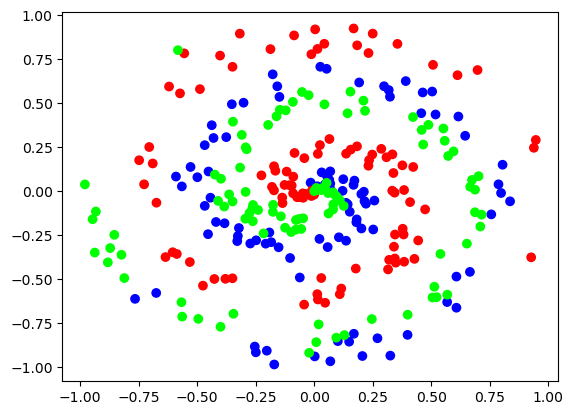

In [118]:
# Trainingsdaten
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap="brg")

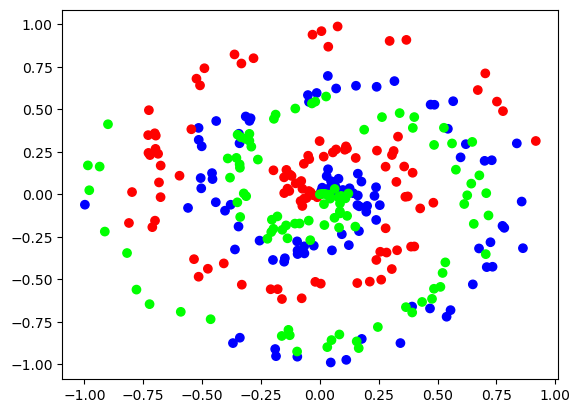

In [119]:
# Testdaten
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap="brg")

Wie man sehen kann sind im Test-Datensatz viele Ausreißer. Dafür ist eine Accuracy von 80% gar nicht so schlecht.

# Code bis S.326

In [46]:
import numpy as np

# Spiral-Trainingsdaten mit Klassenlabels
def spiral_data(points, classes):
    X = np.zeros((points*classes, 2))
    y = np.zeros(points*classes, dtype='uint8')
    for class_number in range(classes):
        ix = range(points*class_number, points*(class_number+1))
        r = np.linspace(0.0, 1, points)  # radius
        t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
        X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
        y[ix] = class_number
    return X, y


# Dense layer
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons):
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

# ReLU activation
class Activation_ReLU:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs
        self.output = np.maximum(0, inputs)
    # Backward pass
    def backward(self, dvalues):
        # Since we need to modify original variable,
        # let's make a copy of values first
        self.dinputs = dvalues.copy()
        # Zero gradient where input values were negative
        self.dinputs[self.inputs <= 0] = 0

# Softmax activation
class Activation_Softmax:
    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis=1,keepdims=True))
        # Normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis=1,keepdims=True)
        self.output = probabilities
    """# Backward pass
    def backward(self, dvalues):
        # Create uninitialized array
        self.dinputs = np.empty_like(dvalues)
        # Enumerate outputs and gradients
        for index, (single_output, single_dvalues) in enumerate(zip(self.output, dvalues)):
            # Flatten output array
            single_output = single_output.reshape(-1, 1)
            # Calculate Jacobian matrix of the output
            jacobian_matrix = np.diagflat(single_output) - np.dot(single_output, single_output.T)
            # Calculate sample-wise gradient
            # and add it to the array of sample gradients
            self.dinputs[index] = np.dot(jacobian_matrix,single_dvalues)"""

# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss

# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
    # Forward pass
    def forward(self, y_pred, y_true):
        # Number of samples in a batch
        samples = len(y_pred)
        # Clip data to prevent division by 0
        # Clip both sides to not drag mean towards any value
        y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
        # Probabilities for target values -
        # only if categorical labels
        if len(y_true.shape) == 1:
            correct_confidences = y_pred_clipped[range(samples),y_true]
        # Mask values - only for one-hot encoded labels
        elif len(y_true.shape) == 2:
            correct_confidences = np.sum(y_pred_clipped * y_true,axis=1)
        # Losses
        negative_log_likelihoods = -np.log(correct_confidences)
        return negative_log_likelihoods
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # Number of labels in every sample
        # We'll use the first sample to count them
        labels = len(dvalues[0])
        # If labels are sparse, turn them into one-hot vector
        if len(y_true.shape) == 1:
            y_true = np.eye(labels)[y_true]
        # Calculate gradient
        self.dinputs = -y_true / dvalues
        # Normalize gradient
        self.dinputs = self.dinputs / samples


# Softmax classifier - combined Softmax activation
# and cross-entropy loss for faster backward step
class Activation_Softmax_Loss_CategoricalCrossentropy():
    # Creates activation and loss function objects
    def __init__(self):
        self.activation = Activation_Softmax()
        self.loss = Loss_CategoricalCrossentropy()
    # Forward pass
    def forward(self, inputs, y_true):
        # Output layer's activation function
        self.activation.forward(inputs)
        # Set the output
        self.output = self.activation.output
        # Calculate and return loss value
        return self.loss.calculate(self.output, y_true)
    # Backward pass
    def backward(self, dvalues, y_true):
        # Number of samples
        samples = len(dvalues)
        # If labels are one-hot encoded,
        # turn them into discrete values
        if len(y_true.shape) == 2:
            y_true = np.argmax(y_true, axis=1)
        # Copy so we can safely modify
        self.dinputs = dvalues.copy()
        # Calculate gradient
        self.dinputs[range(samples), y_true] -= 1
        # Normalize gradient
        self.dinputs = self.dinputs / samples


class Optimizer_SGD_without_lrDecay_and_Momentum:
    def __init__(self, learning_rate=1.0):
        self.learning_rate = learning_rate
    # Update parameters
    def update_params(self, layer):
        layer.weights += -self.learning_rate * layer.dweights
        layer.biases += -self.learning_rate * layer.dbiases


class Optimizer_SGD_lrDecay:
    def __init__(self, lr=1, decayRate=0):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):
        layer.weights += -self.current_lr * layer.dweights
        layer.biases += -self.current_lr * layer.dbiases

    def update_step(self):
        self.step += 1


class Optimizer_SGDmomentum:
    def __init__(self, lr=1, decayRate=0, momentum=0):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.momentum = momentum # neuer HyperParameter

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        if self.momentum:
            # wenn ein layer keine weight_momentums hat erstellen mit Nullen:
            if not hasattr(layer, "weight_momentums"):
                layer.weight_momentums = np.zeros_like(layer.weights)
                #wenn die nicht für weights gibt, auch nicht für biases:
                layer.bias_momentums = np.zeros_like(layer.biases)
        
            # Weights Momentums
            weight_updates = self.momentum * layer.weight_momentums -(self.current_lr * layer.dweights)
            layer.weight_momentums = weight_updates #übergabe für nächste Epoche

            # Biases Momentums
            bias_updates = self.momentum * layer.bias_momentums -(self.current_lr * layer.dbiases)
            layer.bias_momentums = bias_updates #übergabe für nächste Epoche

        else: #falls kein momentum und nur lr und aktueller Gradient
            weight_updates = -self.current_lr * layer.dweights
            bias_updates = -self.current_lr * layer.dbiases

        layer.weights += weight_updates
        layer.biases += bias_updates

    def update_step(self):
        self.step += 1

    
class Optimizer_AdaGrad:
    def __init__(self, lr=1, decayRate=0, epsilon=1e-7):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        # self.momentum = momentum # alter HyperParameter
        self.epsilon = epsilon # neuer HyperParameter

    # wird einmal vor jeder Backpropagation ausgeführt
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        # statt weight_momentums, machen wir nun parm_caches
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
    
        # Update Cache mit Current Gradient^2
        layer.weight_cache += layer.dweights ** 2
        layer.bias_cache += layer.dbiases ** 2

        # Normalisierung der Updates dieser Epoche mit Cache Historie
        layer.weights += -self.current_lr * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_lr * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def update_step(self):
        self.step += 1



class Optimizer_RMSProp:
    def __init__(self, lr=0.001, decayRate=0, epsilon=1e-7, rho=0.9):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.epsilon = epsilon # neuer HyperParameter
        self.rho = rho

    # 1/t LR Decay
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases einer Schicht updaten
    def update_params(self, layer):

        # Cache 0 Instanziierung
        if not hasattr(layer, "weight_cache"):
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
    
        # Update Cache mit Current Gradient^2 und rho
        layer.weight_cache = self.rho * layer.weight_cache + (1 -self.rho) * (layer.dweights ** 2)
        layer.bias_cache = self.rho * layer.bias_cache + (1 -self.rho) * (layer.dbiases ** 2)

        # Normalisierung der Updates dieser Epoche mit Cache und AdaGrad Bruch-Verfahren
        layer.weights += -self.current_lr * layer.dweights / (np.sqrt(layer.weight_cache) + self.epsilon)
        layer.biases += -self.current_lr * layer.dbiases / (np.sqrt(layer.bias_cache) + self.epsilon)

    def update_step(self):
        self.step += 1


class Optimizer_Adam:
    def __init__(self, lr=0.001, decayRate=0, epsilon=1e-7, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.current_lr = lr
        self.decayRate = decayRate
        self.step = 0
        self.epsilon = epsilon # neuer HyperParameter
        self.beta1 = beta1
        self.beta2 = beta2

    # 1/t LR Decay
    def update_lr(self):
        if self.decayRate: # falls man "0" hat, macht ist die lr quasi steady und decay ist deaktiviert
            self.current_lr = self.lr * (1. / (1. + self.decayRate * self.step))

    # Weights und Biases eines Layers updaten
    def update_params(self, layer):

        # Cache 0-Initialisierung
        if not hasattr(layer, "weight_cache"):
            # wie bei RMSProp Cache
            layer.weight_cache = np.zeros_like(layer.weights)
            layer.bias_cache = np.zeros_like(layer.biases)
            # wie bei SGD Momentums
            layer.weight_momentums = np.zeros_like(layer.weights)
            layer.bias_momentums = np.zeros_like(layer.biases)
    
        # Update Momentum mit Current Gradients und beta1's anstatt rho wie bei RMSProp
        layer.weight_momentums = self.beta1 * layer.weight_cache + (1 -self.beta1) * layer.dweights
        layer.bias_momentums = self.beta1 * layer.bias_cache + (1 -self.beta1) * layer.dbiases

        # Momentums korrigieren/anheizen mit 1 - beta^step, nach ca. 50 Steps normal groß, bei erster Epoche 10x 
        weight_momentums_corrected = layer.weight_momentums / (1 -self.beta1 **(self.step+1)) # + 1 weil in der ersten Epoche "0"
        bias_momentums_corrected =  layer.bias_momentums / (1 -self.beta1 **(self.step+1))

        # Update Cache mit Squared Current Gradients wie bei AdaGrad und beta2 anstatt rho wie bei RMSProp
        layer.weight_cache = self.beta2 * layer.weight_cache + (1 - self.beta2) * layer.dweights**2
        layer.bias_cache = self.beta2 * layer.bias_cache + (1 - self.beta2) * layer.dbiases**2

        # Cache korrigieren/anheizen mit beta2 wird wesentlich stärker als Momentums angeheizt! 1000x in der ersten Epoche
        # Erst in der 5000. Epoche normal "1"
        # Der Cache ist für die Normalisierung der Updates der Parameter zuständig, Am Anfang wird sehr stark normalisiert!
        # Am Ende muss nicht mehr so stark normalisiert werden und Parameter-Updates dürfen überproportional werden
        weight_cache_corrected = layer.weight_cache / (1 -self.beta2 **(self.step+1))
        bias_cache_corrected = layer.bias_cache / (1 -self.beta2 **(self.step+1))

        # Vanilla SGD Parameter Update und Normalisierung
        # Mit Square Root Cache vom AdaGrad Bruch-Verfahren
        layer.weights += -self.current_lr * weight_momentums_corrected / (np.sqrt(weight_cache_corrected) + self.epsilon)
        layer.biases += -self.current_lr * bias_momentums_corrected / (np.sqrt(bias_cache_corrected) + self.epsilon)

    def update_step(self):
        self.step += 1





X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64)
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(decayRate=0.000001, lr=0.05)

for epoch in range(20001): # 10.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    # loss
    loss = loss_activation.forward(dense2.output, y)

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}', f'acc: {accuracy:.3f}', f'loss: {loss:.3f}', f'lr: {optimizer.current_lr}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

epoch: 0 acc: 0.290 loss: 1.099 lr: 0.05
epoch: 100 acc: 0.453 loss: 1.038 lr: 0.04999505049000149
epoch: 200 acc: 0.477 loss: 1.003 lr: 0.04999005197965605
epoch: 300 acc: 0.517 loss: 0.978 lr: 0.04998505446871385
epoch: 400 acc: 0.537 loss: 0.946 lr: 0.04998005795687521
epoch: 500 acc: 0.567 loss: 0.918 lr: 0.04997506244384053
epoch: 600 acc: 0.587 loss: 0.897 lr: 0.049970067929310344
epoch: 700 acc: 0.607 loss: 0.884 lr: 0.049965074412985325
epoch: 800 acc: 0.580 loss: 0.874 lr: 0.049960081894566244
epoch: 900 acc: 0.630 loss: 0.857 lr: 0.049955090373754
epoch: 1000 acc: 0.643 loss: 0.849 lr: 0.049950099850249605
epoch: 1100 acc: 0.630 loss: 0.844 lr: 0.0499451103237542
epoch: 1200 acc: 0.640 loss: 0.835 lr: 0.04994012179396903
epoch: 1300 acc: 0.643 loss: 0.832 lr: 0.04993513426059549
epoch: 1400 acc: 0.640 loss: 0.827 lr: 0.04993014772333506
epoch: 1500 acc: 0.640 loss: 0.827 lr: 0.04992516218188936
epoch: 1600 acc: 0.627 loss: 0.827 lr: 0.04992017763596011
epoch: 1700 acc: 0.627 

# Validation Dataset | Der 3er Split
S. 326

Wie in den vorherigen Kapiteln beschrieben, muss man den Batch in Trainings- und Test-Datensatz unterteilen, damit man die Over/Underfitting erkennen kann. Tuned man jedoch die Hyperparameter hin zum Testdatensatz läuft man ebenfalls in Gefahr den Testdatensatz zu overfitten. Der Testdatensatz sollte nur einmal für seine eigentliche Verwendung verwendet werden.

Daher ist es sinnvoll einen dritten Datensatz ins Spiel zu bringen. Den sogenannten *Validation Dataset*. Auch hier soll es sich wieder um Out-Of-Training-Samples handeln jedoch nicht die des Test-Datensatzes. Wir splitten also unseren Batch in 3 Datensätze:

1. Training (Lernen)
2. Validation/Developement (HyperParameter Tuning)
3. Testing (Performance?)

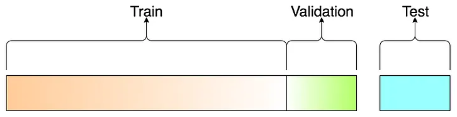 https://towardsdatascience.com/train-validation-and-test-sets-72cb40cba9e7

Gelernt wird nur mit dem Trainingsdatensatz. Den Validierungsdatensatz lernt das NN nie, es beinflusst es lediglich indirekt, da wir mithilfe desen die Hyperparameter anpassen. Aus diesem Grund wird der Validierungsdatensatz auch "Dev Set" genannt. Er hilft bei der Entwicklung des NN. Der TestDatensatz wird nur einmal verwendet um die abschließende Qualität zu bemessen. Beispielsweise wird bei Kaggle Competitions zu Beginn Trainings- und Validation-Dataset released und der Testdatensatz erst nach der Verkündung des Gewinners.

Der Testdatensatz wird meistens genaustens gewählt und enthält im besten Fall Samples von allen Klassen die das NN erkennen soll. 


## Crossvalidation
Haben wir einen zu kleinen Batch um ihn in 3 Datensätze aufzusplitten wendet man Crossvalidation an. Hier wird der Trainingsdatensatz einfach in Chunks unterteilt. Sagen wir 5 Stück. Trainiert wird dann auf den ersten 4 Chunks und validiert auf dem Letzten. Nachdem wir validiert haben, starten wir das Training erneute tauschen aber den Validierungs-Chunk gegen einen der Trainings-Chunks aus. Das wiederholen wir solange bis alle Trainings-Chunks einmal Validierungs-Chunk waren:

1. Iteration: 
    - 4 TrainingsChunks: A, B, C, D
    - 1 ValiiderungsChunk: E

2. Iteration:
    - 4 TrainingsChunks: A, B, C, E
    - 1 ValiiderungsChunk: D
    
usw... 

Dieses Verfahren wird auch *"k-fold cross-validation"* genannt. Wird wohl immer populärer. Bei unserem o.g. Beispiel wäre $k = 5$.

# *Preprocessing* und der Trainings Datensatz
S. 330

NNs funktionieren am besten auf Daten in einer Range von $[0, 1]$ oder noch besser: $[-1, 1]$. Dieser Umstand hat mehrere Gründe:

1. Aktivierungsfunktionen wie $Tanh$ oder $Sigmoid$ haben einen begrenzten Definitionsbereich. $Sigmoid$ und $Softmax$ haben einen Output von $[0, 1]$ $Tanh$ hingegen aber einen von $[-1, 1]$.
2. Durch zu große Eingabedaten kann es zu einer numerischen Instabilität kommen, bei der Parameter zu groß werden und der Gradient zu stark schwankt. Das wiederum führt zu einer langsameren Konvergenz oder gar zum Lernversagen.
3. Eingaben werden durch eine Range von $[-1,1]$ durch die Multiplizierung mit $Weights$ auf ein Fraction gehalten. Wäre es kleiner als $-1$ oder größer als $1$ würden Eingangsdaten zu einem Vielfachen werden, was ihrer Ursprungsform zu stark verändert.
4. Durch die Einschränkung wird ein FloatingPoint-Overflow vermieden.

Aus diesen Gründen lohnt es sich die Trainingsdaten zu *preprocessen*. Neben "Preprocessing" finden sich auch andere Wörter für dieses Verfahren wie "Standardisierung", "Scaling", "Mean Removal".

### Wie Daten auf eine Range von $[-1, 1]$ scalen?
Ein einfacher Trick z.B. bei Pixel-Farbwerten ist es durch den höchsten Wert wie z.B. $255$ zu teilen. Man teilt den gesamten Datensatz durch den höchsten Wert im Satz und bekommt so maximal $1$ in einigen Samples und eine Range von $[0,1]$.

In [12]:
zahlen = [1, 3,  20, 1,  200, 51, 255]

[1, 3, 20, 1, 200, 51, 255]


In [15]:
rescaled = []
for x in zahlen:
    rescaled.append(x / max(zahlen))

print(rescaled)

[0.00392156862745098, 0.011764705882352941, 0.0784313725490196, 0.00392156862745098, 0.7843137254901961, 0.2, 1.0]


Möchte man eine Range von $[-1, 1]$, so muss man die Hälfe der höchsten Zahl von allen Zahlen abziehen und dann hinterher durch diese Hälfe teilen:

In [17]:
zahlen = [1, 3,  20, 1,  200, 51, 255]
maxHalf = max(zahlen) / 2
maxHalf

127.5

In [19]:
rescaled = []
for x in zahlen:
    rescaled.append(x - maxHalf)
print(rescaled)

[-126.5, -124.5, -107.5, -126.5, 72.5, -76.5, 127.5]


In [20]:
rescaled2 = []
for x in rescaled:
    rescaled2.append(x / maxHalf)
print(rescaled2)

[-0.9921568627450981, -0.9764705882352941, -0.8431372549019608, -0.9921568627450981, 0.5686274509803921, -0.6, 1.0]


Trainings, Validierungs und Test-Datensatz sollten einheitlich skaliert werden. Das Maximum sollte also über alle Datensätze gefunden werden damit alle Werte durch diesen Wert dividiert werden können.

> Die Skalierung sollte auch für den späteren PROD Einsatz mit dem Modell ausgeliefert werden, damit Echte Daten von Sensoren ebenfalls skaliert werden können. 

Wenn die Validierungs/Test oder PROD-Daten nicht genau zu den Werten des Trainingssatzes passen und die Skalierung mit dem Maximum des Trianingsatzes durchgeführt wird, kann es passieren das die Werte etwas außerhalb der gewünschten Range liegen. Etwas sei wohl nicht schlimm, da unser Netz auf diesen Daten nicht lernt. 

### Data Augmentation
Es kann vorkommen dass man nicht genügend Samples hat, dann kann man seinen Batch vergrößern (augmenten), indem man z.B. bei CV ein Sample also ein Foto in anderem Winkel zeigt, dreht oder anderweitig zu einem "Neuen" Sample manipuliert. Dies kann vor allem auch dann sinnvoll sein, wenn man z.B. CV bei Selfdriving einsetzt. In der Realität sind Stop-Schilder oftmals verdreht oder geknickt. Trotzdem darf man dort nicht einfach weiterfahren. 

### Wie viele Samples reichen?
Auch hier muss man Intuition walten lassen. Generell gilt desto mehr Features, oder desto komplexer die Funktion der Realwelt, desto mehr Samples sollte man haben. Und anhand der Samples lässt sich die Neuronen/Layer Anzahl bestimmen. Zu viele führen zu Auswendiglernen des Batches zu wenige zum underfitten.

Hier scheint Intution dennoch SoA zu sein. Ansonsten könne man auch die "Statistische Macht" berechnen.

# L1 und L2 Regularisierung
Regularisierung ist eine Methode die bei der Generalisierung des NN helfen soll. Durch das berechnen einer $penalty$ addiert auf den $loss$, soll das Netz für große $Weights$ und $Biases$ bestraft werden. Große Parameter können darauf hinweißen dass das NN versucht auswendig zu lernen. Es wird angenommen dass das NN so viele Neuronen benutzen sollte wie möglich und nicht einzelne. L1 und L2 Regularisierung sind also Methoden zur Verhinderung von Overfitting:

- **L1-Regularisierung**: (auch bekannt als *Lasso-Regularisierung*) fügt einen Strafterm zur Fehlerfunktion des Modells hinzu, der eine Fraction der Summe der absoluten Werte der Modellparameter ist. Dadurch werden einige Parameter auf Null gesetzt, was dazu führt, dass das Modell einfacher wird und weniger anfällig für Overfitting ist.

- **L2-Regularisierung**: (auch bekannt als *Ridge-Regularisierung*) fügt einen Strafterm zur Fehlerfunktion hinzu, der eine Fraction der Summe der Quadrate der Modellparameter ist. Das Quadrieren führt dazu, dass das Modell dazu neigt, kleinere Parameter als bei L1 zu haben, was ebenfalls dazu beitragen kann, das Overfitting zu reduzieren. Durch die Quadrierung werden größere Parameter stärker bestraft als kleinere. Dies reduziert die Überanpassung, indem es das Modell dazu zwingt, die Auswirkungen aller Merkmale auf die Vorhersage auszugleichen, anstatt eine hohe Empfindlichkeit gegenüber wenigen Merkmalen zu haben.

Im Vergleich zur L1-Regularisierung, die den Betrag der Modellparameter verwendet, kann die L2-Regularisierung dazu führen, dass das Modell eine größere Anzahl von Merkmalen berücksichtigt und dabei eine geringere Anzahl von Parametern verwendet. Das Quadrat in der Regularisierungsfunktion sorgt dafür, dass der Einfluss von Ausreißern oder ungewöhnlichen Werten auf die Modellparameter reduziert wird, was die Robustheit des Modells erhöht.

**Geschichte:** Das "L" steht für die "Norm" eines Vektors. Eine Norm ist eine mathematische Funktion, die die Größe eines Vektors berechnet. In der linearen Algebra wird die L1-Norm auch als Manhattan-Norm bezeichnet, weil sie die Summe der absoluten Werte der Komponenten eines Vektors berechnet. Die L2-Norm wird auch als euklidische Norm bezeichnet, weil sie der Wurzel aus der Summe der Quadrate der Komponenten eines Vektors entspricht. Das "L" in L1 und L2 steht für "Lebesgue", den Namen des französischen Mathematikers Henri Lebesgue. Er hat viele wichtige Beiträge zur mathematischen Analyse geleistet, darunter die Entwicklung der Lebesgue-Integration und der Lebesgue-Maße. In der linearen Algebra wird sein Name oft verwendet, um verschiedene Normen zu benennen, einschließlich der L1-Norm und der L2-Norm. Die L1-Regularisierung wurde in einem Artikel von Tibshirani im Jahr 1996 vorgestellt und später von anderen Forschern auf neuronalen Netzen angewendet. Die L2-Regularisierung wurde ebenfalls in den späten 1990er Jahren in der Literatur eingeführt und erhielt bald danach eine breite Anwendung in der Praxis. Bekannt geworden wurde diese Technik in einem Paper von *"LeCun"* 1998 https://cseweb.ucsd.edu/classes/wi08/cse253/Handouts/lecun-98b.pdf

Beide Regularisierungsmethoden haben den Effekt, dass sie die Komplexität des Modells reduzieren, indem sie einige Modellparameter "zurückhalten". L1-Regularisierung hat auch den zusätzlichen Vorteil, dass sie eine "sparse" Lösung fördert, bei der einige Parameter genau Null sind und somit aus dem Modell entfernt werden können. Das bedeutet, dass die L1-Regularisierung die Tendenz hat, Gewichte, die nahe bei Null liegen, auf exakt Null zu setzen, was zur sogenannten "sparse" Lösung führt, bei der einige der Modellparameter Null sind und somit nicht mehr zur Vorhersage beitragen. Wenn einige Merkmale der Daten tatsächlich irrelevant oder redundant sind, kann die L1-Regularisierung dazu beitragen, diese Merkmale zu identifizieren und die entsprechenden Modellparameter auf null zu setzen, was zu einer höheren Interpretierbarkeit des Modells und einer Reduktion der Modellkomplexität führt. Darüber hinaus kann die spärliche Lösung dazu beitragen, das Risiko von Overfitting zu reduzieren, insbesondere wenn die Anzahl der Eingabemerkmale größer ist als die Anzahl der verfügbaren Beobachtungen.

L2 wird in der Praxis wohl häufiger verwendet, da es größere Werte durch die Quadrierung stärker bestraft und kleinere nicht so sehr, es ist also nicht-linear. L1 hingegen ist proportional und bewertet alle Werte gleich, ist also linear. L1 hat zudem den Nachteil das es kleinere Weights stärker bestraft als L2 was dazu führt dass das NN bei kleineren Werten weniger anschlägt als bei Größeren. L1 wird also nur selten verwendet.

**Praxis:** In TensorFlow zum Beispiel ist L2-Regularisierung der Standard bei der Optimierung von neuronale Netzen mit der Adam-Optimierung und die Standard-Regulierungskonstante ist 0,01. In Keras ist die L2-Regularisierung ebenfalls eine Standardoption bei vielen Schichten, wie Dense, Conv2D, LSTM und anderen, und die Standard-Regulierungskonstante ist 0,01.

Es ist jedoch wichtig zu beachten, dass der Standardwert nicht immer der beste Wert für das spezifische Problem ist und eine feine Abstimmung der Regularisierungskonstanten erforderlich sein kann, um die bestmögliche Leistung des Modells zu erreichen.

## Die Wahl der richtigen $Weight$ Initialisierung
Bevor wir die Regularisierung anwenden sollten wir uns anschauen in welchem Werte-Bereich sich unsere Weights aufhalten. Wie man unten sehen kann haben wir unsere Weights aus einer Normalverteilung mit einer Standardabweichung von $1$ random erzeugt. Hinterher haben wir diese dann nochmal mit $0,01$ multipliziert. Effektiv haben wir diese Werte dann also in eine sehr viel kleinere Range als $[-1, 1]$ gebracht, nämlich $[-0.01, 0.01]$.

In [2]:
0.01 * np.random.randn(5,5) #so initialisieren wir im Framework die Weights

array([[-0.00116115,  0.02241121,  0.00379262,  0.0024733 , -0.01047775],
       [ 0.01056889,  0.0079988 , -0.0152597 , -0.00499674,  0.02425705],
       [ 0.02045886,  0.00671825, -0.00510129, -0.00970706, -0.00550216],
       [-0.00218208, -0.00582826,  0.00457939, -0.00982842, -0.01838665],
       [-0.00567398, -0.00496467, -0.02114629, -0.00638144,  0.01363524]])

In [42]:
np.random.randn(5,5) #ohne 0,01

array([[-1.37757234, -2.91664303, -0.58124455,  0.23728565, -0.43822935],
       [-0.35386691, -0.92918029, -0.40910099, -0.06552178, -0.23276065],
       [ 0.51703593, -0.50190327,  1.63842981, -1.37987628, -0.66926784],
       [ 1.30837182, -0.81971644,  0.08406326, -0.2113923 ,  0.08477431],
       [ 0.18307484, -1.82496439,  0.70634973, -0.08192319, -0.81850921]])

Nach dem Training sind unsere Weights etwas ausgeufert mit Werten bis zu $9,23...$, was wir mit L1 und L2 verhindern würden.

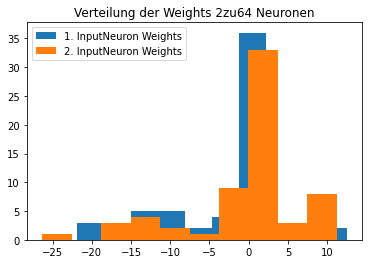

In [35]:
plt.hist(dense1.weights[0], label="1. InputNeuron Weights") # weigts für erstes Input Neuron auf 64 Hidden Neuronen
plt.hist(dense1.weights[1], label="2. InputNeuron Weights") # weigts für zweites Input Neuron auf 64 Hidden Neuronen
plt.title("Verteilung der Weights 2zu64 Neuronen")
plt.legend()

Wie man sehen kann gibt es sogar sehr massive Ausweicher sowohl bei den Weights vor dem Hidden Layer sowohl als auch danach:

(array([[ 0.,  0.,  1.,  1.,  6.,  5., 11., 37.,  2.,  1.],
        [ 2.,  0.,  3.,  3.,  3.,  5.,  9., 35.,  3.,  1.],
        [ 0.,  0.,  0.,  2.,  2., 15., 12., 31.,  1.,  1.]]),
 array([-47.7037641 , -40.91913823, -34.13451235, -27.34988647,
        -20.5652606 , -13.78063472,  -6.99600885,  -0.21138297,
          6.57324291,  13.35786878,  20.14249466]),
 <a list of 3 BarContainer objects>)

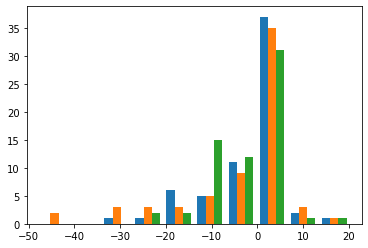

In [31]:
plt.hist(dense2.weights) # Weights nach Hidden Layer für die 3 Ausgangsneuronen

Tatsächlich wählt man die Weights je nach der Aktivierungsfunktion die man verwendet. Für $Tanh(z)$ und $Sigmoid(z)$ gibt es eine Vorgehensweise und $ReLU(z)$ jeweils auch. Die Biases haben wir beginnend einfach auf $0$ gesetzt. Sie bekommen ihren Wert erst durch den Gradienten der ersten Epoche. Generell wird aber immer aus einer Normalverteilung mit Mittelwert $0$ und einer spezifischen Standardabweichung zufällig gezogen. Die Standardabweichung wird je nach Methode unterschiedlich gewählt. (https://machinelearningmastery.com/weight-initialization-for-deep-learning-neural-networks/)

In unserem biseherigem Framework haben wir einen Mittelwert von $0$ eine Standardabweichung von $1$, wobei wir die Werte mit dem Faktor $0,01$ multiplizieren und so quasi nur $1$% der Werte bekommen also haben wir eine wesentlich kleinere Standardeviation.

Die Auswahl der Weight-Initialisierung wirkt sich auf die Konvergenz des NNs aus!

## Forward Pass mit Regularisierung
Um die Einwirkung der L1 und L2 Strafen auf die Parameter zu kontrollieren, wird häufig ein $lambda$ Wert $λ$ verwendet. Je höher dieser Wert, desto höher die Bestrafung.

S. 334

**L1** $Weight$ und $Bias$ Regularisierung:

$L_{1w} = λ * \sum_{m} |w_{m}|$

$L_{1b} = λ * \sum_{n} |b_{n}|$

**L2** $Weight$ und $Bias$ Regularisierung:

$L_{2w} = λ * \sum_{m} w_{m}^2$

$L_{2b} = λ * \sum_{n} b_{n}^2$

Der $Loss$ wird hinterher einfach mit den Termen addiert:

$Loss = DataLoss + L_{1w} + L_{1b} + L_{2w} + L_{2b}$

> Umso größer unsere Weights sind, desto größer wird der gesamte Loss

Warum wird sich nicht für $L1$ oder $L2$ entschieden und direkt einfach alles drauf addiert? Wahrscheinlich weil man dann hinteher über die $λ$'s die jeweiligen ausstellen kann.

Die Implementierung von L1 und L2 beginnt in der **Dense Layer**-Klasse mit den $lambda$'s' auch wenn sie unten nicht so deklariert werden:

In [36]:
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0, weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0): # NEU Parameter
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        # NEU ---------------

        # L1 Regularisierungs Lambdas
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1

        # L2 Regularisierungs Lambdas
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2

        # NEU ---------------

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)
        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

Die Regularisierer stellen die $lambda$'s dar, welche nun neue HyperParameter des NNs sind. Die Addierung auf den $Loss$ wird in der **Loss**-Klasse realisiert, unabhängig von der $Loss(A, y)$-Funktion die hinterher verwendet wird. Aus diesem Grund wird der generellen **Loss**-Klasse eine neue Methode hinzugefügt die von allen Instanziierten $Loss(A, y)$-Funktion geerbt wird. Wie z.B. von unserer Loss_CategoricalCrossentropy $Loss(A, y)$-Funktion. 

Die Regularisierung wird dann von der jeweiligen Loss-Funktion nur verwendet wenn der jeweilige $λ > 0$ ist:

In [41]:
# Common loss class
class Loss:
    # Calculates the data and regularization losses
    # given model output and ground truth values
    def calculate(self, output, y):
        # Calculate sample losses
        sample_losses = self.forward(output, y)
        # Calculate mean loss
        data_loss = np.mean(sample_losses)
        # Return loss
        return data_loss
    
    # NEU ---------------
    def regularization_loss(self, layer):
        regularization_loss = 0 # bei default

        # L1 Weight Regularisierung
        if layer.weight_regularizer_l1 > 0:
            regularization_loss += layer.weight_regularizer_l1 * np.sum(np.abs(layer.weights)) # Beträge
        # L1 Bias Regularisierung
        if layer.bias_regularizer_l1 > 0:
            regularization_loss += layer.bias_regularizer_l1 * np.sum(np.abs(layer.biases)) # Beträge

        # L2 Weight Regularisierung
        if layer.weight_regularizer_l2 > 0:
            regularization_loss += layer.weight_regularizer_l2 * np.sum(layer.weights**2) # Quadrierung
        # L2 Bias Regularisierung
        if layer.bias_regularizer_l2 > 0:
            regularization_loss += layer.bias_regularizer_l2 * np.sum(layer.biases**2) # Quadrierung
        
        return regularization_loss
    # NEU ---------------
        

Dadurch dass wir auf Layer Ebene die $Lambda$'s gesetzt haben, ist die Berechnung des generellen $Loss$ nun eleganter:

In [ ]:
# Berechnung des Losses der genutzt Loss-Function X (bei uns bis jetzt Categorical Cross Entropy Loss mit Softmax)
loss = loss_functionX.forward(dense2.output, y) #dense2.output ist quasi "A" bei Loss(A)

# neue "regularization_loss" unabhänig von der Parent Loss-Klasse 
# Aufruf der neuen Methode in Parent-Class "Loss"
regularization_loss = loss_functionX.regularization_loss(dense1) + loss_functionX.regularization_loss(dense2)

# der neue loss:
loss = loss + regularization_loss

Dadurch das wir die $Lambda$'s auf Layer Ebene haben, können wir nun für jeden Layer einstellen wie stark dieser Berechnung ins Gewicht fallen soll.

### Backward Pass, Implementierung der Regularisierung in $Loss(A, y)$
Dadurch dass wir in jedem Layer regulierende L1 und L2 Parameter haben muss unser Backward Pass der genutzten $Loss(A, y)$ Funktion verändert werden. Für die Berechnung der Gradienten müssen wir also eine Partielle Ableitung dieser Terme vornehmen.

S. 338

### Partielle Ableitung von $L_{2w}$
Dadurch dass wir einen Hyperparameter erschaffen haben der sich auf die Weights auswirkt, haben wir auch einen neuen Parameter der Funktion, den wir partiell Ableiten müssen:

$L_{2w} = λ * \sum_{m} w_{m}^2$

Die Partielle wäre dann: 

$\frac{\partial L_{2w}}{\partial w_i} = \frac{\partial}{\partial w_i} \left( λ \sum_{m} w_{m}^2 \right) = 2λw_i$

Die partielle Ableitung von $L_{2w}$ gibt uns an, wie sich die Verlustfunktion ändert, wenn wir das Gewicht $w_i$ um einen kleinen Betrag ändern. 

Die entgültige Implementierung ist hinterher wohl einfach: 

$2λ * W$

Da wir nur das eine Gewicht verändern, während die anderen gleich bleiben, müssen wir dies am Ende wahrscheinlich für jedes Gewicht in einem Layer machen.

### Partielle Ableitung von $L_{1w}$
Bei der $L1$ Regularisierung ist es etwas anders. Da wir eine **abs(w)** bei jedem $w_i$ anwenden, müssen wir die Ableitund dieser Funktion bilden:

Bei der L1-Regularisierung muss die Ableitung der Betragsfunktion berechnet werden. Die Betragsfunktion gibt den absoluten Wert einer Zahl zurück, unabhängig davon, ob sie positiv oder negativ ist.

Die Ableitung der Betragsfunktion ist jedoch nicht eindeutig, weil sie an der Stelle 0 nicht differenzierbar ist. Stattdessen verwenden wir eine stückweise lineare Funktion, um die Ableitung der Betragsfunktion zu approximieren.

Diese stückweise lineare Funktion multipliziert einen Wert mit -1, wenn er kleiner als 0 ist, und mit 1, wenn er größer als 0 ist. Dies ist möglich, weil die Betragsfunktion für positive Werte linear ist, und wir wissen, dass die Ableitung einer linearen Funktion konstant ist:


$f(x)=x$    -> $f'(x)=1$

$f(x)=-x$   -> $f'(x)=-1$

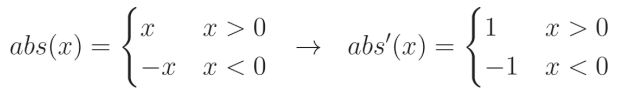

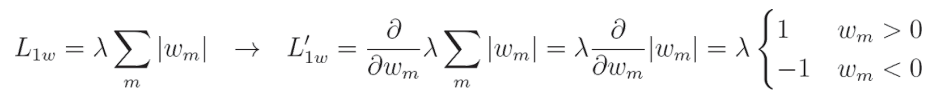

In [8]:
# Implementierungs Beispiel
weights = [0.2, 0.8, -0.5]
dL1 = []
for weight in weights:
    if weight >= 0: # workaround mit >= anstatt einfach nur > weil np.abs() an der Stelle 0 undefiniert ist!
        dL1.append(1)
    else:
        dL1.append(-1)
dL1

[1, 1, -1]

Nun für 3 Neuronen in einem Layer

In [9]:
weights = [[0.2, 0.8, -0.5, 1], 
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

dL1 = []
for neuron in weights:
    neuron_dL1 = []
    for weight in neuron:
        if weight >=0:
            neuron_dL1.append(1)
        else:
            neuron_dL1.append(-1)
    dL1.append(neuron_dL1)
dL1

[[1, 1, -1, 1], [1, -1, 1, -1], [-1, -1, 1, 1]]

Nun mit numpy und *Binären Masken*

In [10]:
weights = np.array([[0.2, 0.8, -0.5, 1],
                    [0.5, -0.91, 0.26, -0.5],
                    [-0.26, -0.27, 0.17, 0.87]])

dL1 = np.ones_like(weights) # Binäre Maske
dL1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

Da **dL1** die gleichen Dimensionen hat wie **weights**, können wir die beiden übereinander legen und einfach dort eine -1 setzen wo der Wert in **weights** $< 0$ ist.

In [14]:
dL1[weights < 0] = -1
dL1

array([[ 1.,  1., -1.,  1.],
       [ 1., -1.,  1., -1.],
       [-1., -1.,  1.,  1.]])

Nun müssen wir für $L1$ nur noch diese Werte mit $λ$ multiplizieren und für $L2$ müssen wir nur alle Weights/Biases mit $2*λ$ multiplizieren.

In [42]:
class Layer_Dense:
    # Layer initialization
    def __init__(self, n_inputs, n_neurons, weight_regularizer_l1=0, weight_regularizer_l2=0, bias_regularizer_l1=0, bias_regularizer_l2=0): # NEU Parameter
        # Initialize weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))

        # NEU ---------------

        # L1 Regularisierungs Lambdas
        self.weight_regularizer_l1 = weight_regularizer_l1
        self.bias_regularizer_l1 = bias_regularizer_l1

        # L2 Regularisierungs Lambdas
        self.weight_regularizer_l2 = weight_regularizer_l2
        self.bias_regularizer_l2 = bias_regularizer_l2

        # NEU ---------------

    # Forward pass
    def forward(self, inputs):
        # Remember input values
        self.inputs = inputs
        # Calculate output values from inputs, weights and biases
        self.output = np.dot(inputs, self.weights) + self.biases
    # Backward pass
    def backward(self, dvalues):
        # Gradients on parameters
        self.dweights = np.dot(self.inputs.T, dvalues)
        self.dbiases = np.sum(dvalues, axis=0, keepdims=True)

        # NEU ---------------

        # Gradient L1/Weights
        if self.weight_regularizer_l1 > 0: #wenn L1 aktiviert ist
            dL1 = np.ones_like(self.weights)
            dL1[self.weights < 0] = -1
            # wenn der Weight < 0 ist ziehen wir noch mehr ab und wenn er größer ist, packen wir noch was auf den Gradienten drauf
            # Ist das Gewicht groß ist also sein Gradient groß, desto mehr zieht der gradient vom weight ab!
            self.dweights += self.weight_regularizer_l1 * dL1 #Nachteil hier ist der Weight nicht drin
        # Gradient L2/Weights
        if self.weight_regularizer_l2 > 0:
            #Viel einfacher als L1 und auch noch besser!
            self.dweights += 2 * self.weight_regularizer_l2 * self.weights

        # Gradient L1/Biases
        if self.bias_regularizer_l1 > 0: # So könnte man die Regulierung nur auf Biases anwenden || ausstellen
            dL1 = np.ones_like(self.biases)
            dL1[self.biases < 0] = -1
            self.dbiases += self.bias_regularizer_l1 * dL1
        # Gradient L2/Biases
        if self.bias_regularizer_l2 > 0:
            self.dbiases += 2 * self.bias_regularizer_l2 * self.biases

        # NEU ---------------

        # Gradient on values
        self.dinputs = np.dot(dvalues, self.weights.T)

Nun können wir unser Print-Statement erweitern:

In [ ]:
print(f'epoch: {epoch}, ' +
      f'acc: {accuracy:.3f}, ' +
      f'loss: {loss:.3f} (' +
      f'data_loss: {data_loss:.3f}, ' +
      f'reg_loss: {regularization_loss:.3f}), ' +
      f'lr: {optimizer.current_learning_rate}')

Bei Instanziieren eines **Layer_Dense**-Objektes können wir unser $λ$ nur als HyperParameter jeweils für $L1$ und $L2$ einstellen:

In [39]:
denseTest = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4) #natürlich nur einen von beiden!

Nun müssten die Weights & Biases weniger explodieren als vorher!

Aber wir wenden den jetzt erstmal nur bei $W_1$ an:

In [43]:
X, y = spiral_data(100, 3)
dense1 = Layer_Dense(2, 64, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4) # NEU -------------------
activation1 = Activation_ReLU()
dense2 = Layer_Dense(64, 3)
loss_activation = Activation_Softmax_Loss_CategoricalCrossentropy()
optimizer = Optimizer_Adam(decayRate=0.000001, lr=0.05)

for epoch in range(20001): # 20.000 Epochen
    # Forward Pass
    dense1.forward(X)
    activation1.forward(dense1.output)
    dense2.forward(activation1.output)
    
    # NEU ---------------

    data_loss = loss_activation.forward(dense2.output, y)

    regularization_loss = loss_activation.loss.regularization_loss(dense1) + loss_activation.loss.regularization_loss(dense2) #bei dense2 ist default=0

    loss = data_loss + regularization_loss

    # NEU ---------------

    # Akkuranz in %
    predictions = np.argmax(loss_activation.output, axis=1) #index vom größten Wert in einem Sample
    accuracy = np.mean(predictions==y)

    # bei jedem 100er Schritt Ausgabe
    if not epoch % 100:
        print(f'epoch: {epoch}, ' +
              f'acc: {accuracy:.3f}, ' +
              f'loss: {loss:.3f} (' +
              f'data_loss: {data_loss:.3f}, ' +
              f'reg_loss: {regularization_loss:.3f}), ' +
              f'lr: {optimizer.current_learning_rate}')

    # Backward Pass
    loss_activation.backward(loss_activation.output, y)
    dense2.backward(loss_activation.dinputs)
    activation1.backward(dense2.dinputs)
    dense1.backward(activation1.dinputs)

    # Update weights and biases
    optimizer.update_lr()
    optimizer.update_params(dense1)
    optimizer.update_params(dense2)
    optimizer.update_step()

AttributeError: 'Loss_CategoricalCrossentropy' object has no attribute 'regularization_loss'